In [143]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from functools import reduce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'./data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(len(df))
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

frame = pd.read_csv("./data/Fat_Supply_Quantity_Data.csv", index_col=None, header=0)

#frame = frame.drop(columns = ["Unit (all except Population)", "Categories", "Items", "Undernourished"])
frame = frame.drop(columns = ["Unit (all except Population)", "Undernourished"])
#Simon à détécter
#Relier nombre population 
#Using miss rangeer

#frame = pd.get_dummies(frame)

data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data_food =  set(frame.columns) - set(data_covid)



frame = frame.dropna()


151
151
170
151
170
23
170
151
151
170
56
151


In [124]:
frame

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active    Population
0                           Afghanistan               0.0000          21.6397       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980       0.0000              0.0000    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  3.892800e+07
1                               Albania               0.0000          32.0002       3.4172                   0.0000                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270       0.0000              0.0000    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660  2.838000e+06
2                               Algeria               0.0000          14.4175       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886       0.0000              0.0000    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  4.435700e+07
3                                Angola               0.0000          15.3041       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128       0.0000              0.0000    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  3.252200e+07
4                   Antigua and Barbuda               0.0000          27.7033       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549       0.0000              0.0000    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163  9.800000e+04
5                             Argentina               0.0000          30.3572       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366           19.6449         17.3147      0.1878     28.5   2.951577  0.080100   2.548591  0.322886  4.537700e+07
6                               Armenia               0.0000          29.6642       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774  0.0103         0.0567      1.8002       0.0000              0.0000    0.9542           20.3384         12.8127      0.8717     20.9   4.075068  0.062212   2.708694  1.304161  2.956000e+06
7                             Australia               0.0000          24.1099       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260  0.1007         0.0422      0.7926       0.0000              0.0000    1.6145           25.8901         20.3612      0.2144     30.4   

In [144]:
frame["Confirmed_finish"] = frame["Confirmed"] - frame["Active"]
frame["Recovered_percent"] = frame["Recovered"] * 100 / frame["Confirmed_finish"] 
frame["Deaths_percent"] = frame["Deaths"] * 100 / frame["Confirmed_finish"] 
frame = frame.dropna()


In [145]:
name_y = "Obesity"

In [146]:
frame.head()

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active  Population  Confirmed_finish  Recovered_percent  Deaths_percent
0          Afghanistan                  0.0          21.6397       6.2224                      0.0                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980          0.0                 0.0    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  38928000.0          0.094893          95.546833        4.453167
1              Albania                  0.0          32.0002       3.4172                      0.0                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270          0.0                 0.0    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660   2838000.0          0.523679          95.653344        4.346656
2              Algeria                  0.0          14.4175       0.8972                      0.0                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886          0.0                 0.0    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  44357000.0          0.109412          95.454545        4.545455
3               Angola                  0.0          15.3041       1.3130                      0.0                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128          0.0                 0.0    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  32522000.0          0.021386          95.226456        4.773544
4  Antigua and Barbuda                  0.0          27.7033       4.6686                      0.0                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549          0.0                 0.0    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163     98000.0          0.133673          96.946565        3.053435

In [147]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeRegressor


In [148]:
name_y

'Obesity'

import time 
time.sleep(4600)
!poweroff

In [68]:
sns.pairplot(frame[frame.columns[0:10]])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9c608f8280> (for post_execute):


KeyboardInterrupt: 

In [11]:
sns.pairplot(
    frame,
    x_vars=data_covid,
    y_vars=data_food,
)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9c608f8280> (for post_execute):


KeyboardInterrupt: 

In [149]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Deaths_percent', 'Recovered_percent', 'Confirmed_finish']

frame_cov = frame[data_covid].sort_values("Confirmed", ascending=True)
frame_food = frame.drop(columns=data_covid + ["Country"])

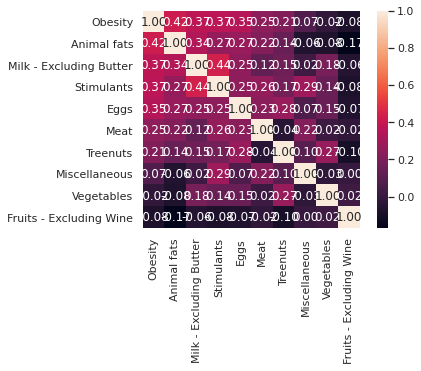

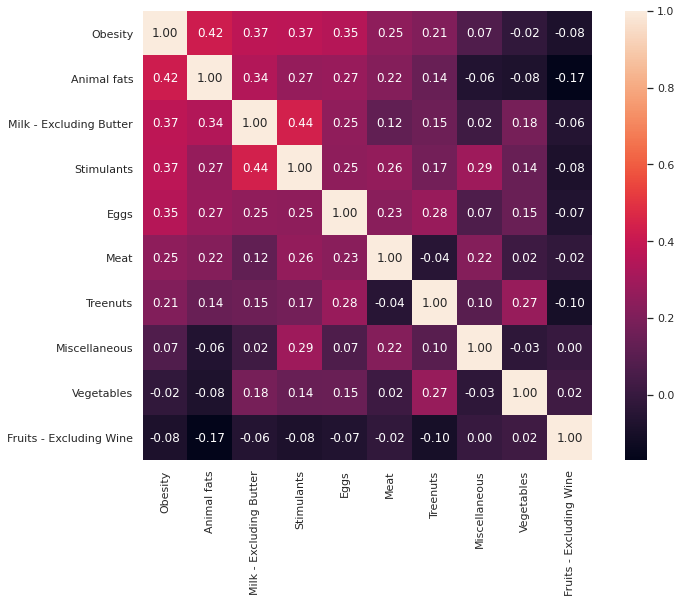

In [151]:
frame_food = frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])
correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


Text(0.5, 1.0, 'Histogramme de cas Confirmé')

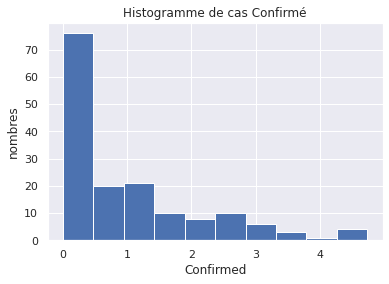

In [152]:
a = plt.hist(frame_cov["Confirmed"])
plt.xlabel('Confirmed')
plt.ylabel('nombres')
plt.title('Histogramme de cas Confirmé')


In [153]:
inds = []
prec = 0
grouped_index = []
cpt = 0
fus = []
for i in a[0]:
    if cpt < 3:
        fus += list(frame_cov[int(prec):int(prec+i)].index.values)
    cpt += 1
    #print(i)
    print(frame_cov[int(prec):int(prec+i)].index.values)
    grouped_index.append(frame_cov[int(prec):int(prec+i)].index.values)    
    prec += i
    
grouped_index[0 : 2] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[0 : 2])] 
#grouped_index[1 : ] = [reduce(lambda i, j: np.array(list(i) + list(j)), grouped_index[1 : ])] 
grouped_index

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132]
[154 106  47  45 115  40  86  46  63  37  68  60  78 153 107  58 100   9
 103 144]
[ 70 133 119  84  43  56  65   1  39  15  17  13 140  42  71 126  72  90
 157 135  67]
[ 77 158  21  66  87  97 137  23  10 145]
[125 122  74 159  35  95 123  18]
[114  55  31  33   8 116 124 108 138  20]
[120  83   5 141 146  51]
[161 118  73]
[6]
[ 38  91 102  14]


[array([ 85, 160, 166,  24, 139, 150,  49, 112, 149,  30, 167,  28,  22,
        101,  96,  16, 136,  89,  93,  59, 113, 151, 143, 128, 156,  99,
        110, 127,   3, 104,  82, 169,  92,  36, 130,  34,  64, 142,  25,
        111,  12,  48, 168,  41, 134,  88,  76, 129,  61,  27,   7,  44,
          0, 162, 148,  62,  79,   4,  54,  94,   2,  57, 117,  98,  69,
        163,  11,  32, 165,  75,  50, 121,  19,  53, 152, 132, 154, 106,
         47,  45, 115,  40,  86,  46,  63,  37,  68,  60,  78, 153, 107,
         58, 100,   9, 103, 144]),
 array([ 70, 133, 119,  84,  43,  56,  65,   1,  39,  15,  17,  13, 140,
         42,  71, 126,  72,  90, 157, 135,  67]),
 array([ 77, 158,  21,  66,  87,  97, 137,  23,  10, 145]),
 array([125, 122,  74, 159,  35,  95, 123,  18]),
 array([114,  55,  31,  33,   8, 116, 124, 108, 138,  20]),
 array([120,  83,   5, 141, 146,  51]),
 array([161, 118,  73]),
 array([6]),
 array([ 38,  91, 102,  14])]

In [154]:
def entity_distance(ent1, ent2):
    cent1 = np.mean(ent1)
    cent2 = np.mean(ent2)
    print(cent1, cent2)
    return np.linalg.norm(cent1-cent2)

In [155]:
distances = np.ones((len(grouped_index), len(grouped_index)), dtype=np.float)

for i in range(len(grouped_index)):
    for j in range(len(grouped_index)):
        if i < j:
            continue
        distances[i, j] = entity_distance(frame_food.loc[grouped_index[i]], frame_food.loc[grouped_index[j]])

for i in range(len(grouped_index)):
    for j in range(len(grouped_index)):
        if i < j:
            distances[i, j] = distances[j, i]
pd.DataFrame(distances)

Alcoholic Beverages          0.001832
Animal fats                  2.848144
Aquatic Products, Other      0.000759
Cereals - Excluding Beer     5.474535
Eggs                         0.743586
Fish, Seafood                0.908074
Fruits - Excluding Wine      0.605122
Meat                         8.715998
Miscellaneous                0.057314
Milk - Excluding Butter      4.317192
Offals                       0.171079
Oilcrops                     4.200108
Pulses                       0.354946
Spices                       0.351030
Starchy Roots                0.321778
Stimulants                   0.461617
Sugar Crops                  0.006899
Sugar & Sweeteners           0.001376
Treenuts                     0.564167
Vegetable Oils              19.582363
Vegetables                   0.311815
Obesity                     14.284375
Recovered_percent           97.083316
dtype: float64 Alcoholic Beverages          0.001832
Animal fats                  2.848144
Aquatic Products, Other      0.0007

0          1          2          3          4          5          6          7          8
0   0.000000  12.574261  16.963877  16.753902  11.801194  14.537087  15.392363  13.003524  27.784683
1  12.574261   0.000000   5.736879   7.708074   2.940098   3.787988   8.733282   9.397457  18.728198
2  16.963877   5.736879   0.000000   6.302473   6.609670   5.319194  10.932386  14.208619  14.575284
3  16.753902   7.708074   6.302473   0.000000   8.190907   8.669798  15.528924  13.391265  12.092862
4  11.801194   2.940098   6.609670   8.190907   0.000000   4.932144   8.731449   9.414397  19.336553
5  14.537087   3.787988   5.319194   8.669798   4.932144   0.000000   7.867019  11.952245  18.289926
6  15.392363   8.733282  10.932386  15.528924   8.731449   7.867019   0.000000  13.208394  25.208698
7  13.003524   9.397457  14.208619  13.391265   9.414397  11.952245  13.208394   0.000000  24.847392
8  27.784683  18.728198  14.575284  12.092862  19.336553  18.289926  25.208698  24.847392   0.000000

In [86]:
frame_food.loc[grouped_index[i]]

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Recovered_percent
38                   0.0       9.7011                      0.0                    1.1998  0.8222         0.3000                   0.1870   8.6212         0.0212                   5.6463  0.0776    0.4941  0.0353  0.0635         0.0565      0.9563          0.0                 0.0    0.4164         21.2267      0.1729          98.199373
91                   0.0       6.4786                      0.0                    1.8437  1.6645         0.6987                   0.3256  16.3118         0.0658                   7.2286  0.0658    0.6402  0.0146  0.1646         0.0329      3.3838          0.0                 0.0    0.1280         10.6855      0.2634          98.677474
102                  0.0       3.8887                      0.0                    3.7312  1.1566         0.3473                   0.3688  14.7778         0.1003                  12.5363  0.0752    0.5837  0.0788  0.0430         0.0251      2.5531          0.0                 0.0    0.8415          8.6332      0.2578          97.800680
14                   0.0      12.6234                      0.0                    1.3531  1.1703         0.6188                   0.2373   5.6817         0.0000                   6.5057  0.1379    0.5226  0.0353  0.0994         0.0770      0.0834          0.0                 0.0    1.2056         19.3504      0.2982           0.000000

Confirmed Cereals - Excluding Beer


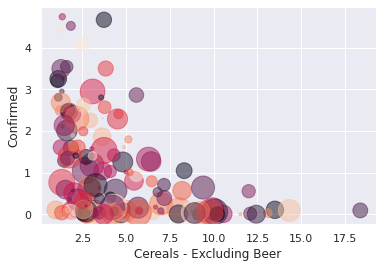

Confirmed Sugar & Sweeteners


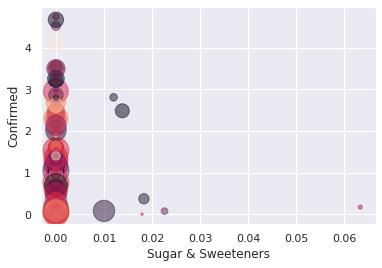

Confirmed Population


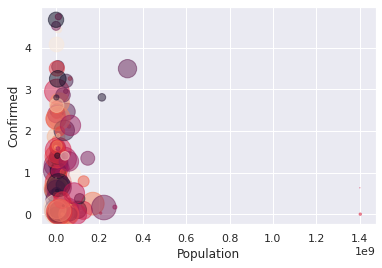

Confirmed Pulses


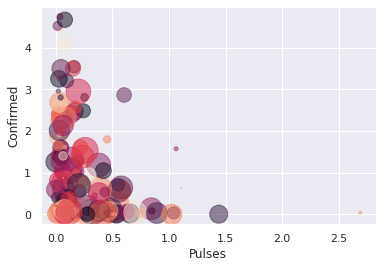

Confirmed Vegetal Products


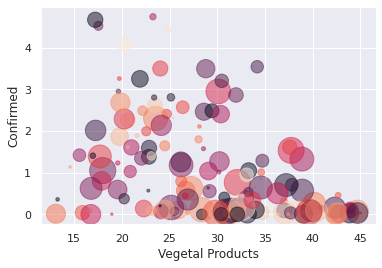

Confirmed Spices


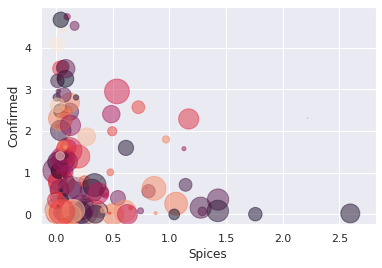

Confirmed Vegetables


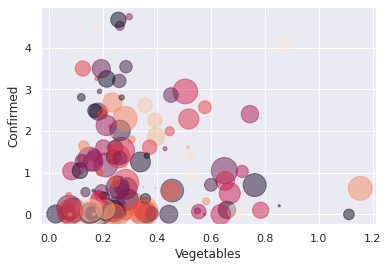

Confirmed Offals


KeyboardInterrupt: 

In [87]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]
data_food =  set(frame.columns) - set(data_covid)

colors=np.random.rand(len(frame))
area= np.pi * (15 * np.random.rand(len(frame)))**2

for malade in data_covid:
    for food in data_food:
        print(malade, food)
        fig, ax = plt.subplots() 
        ax.scatter(y= frame[malade], x=frame[food], s=area, c=colors, alpha=0.5)
        ax.set_ylabel(malade)
        ax.set_xlabel(food)
        plt.show()


In [78]:
data_food

{'Alcoholic Beverages',
 'Animal Products',
 'Animal fats',
 'Aquatic Products, Other',
 'Cereals - Excluding Beer',
 'Country',
 'Eggs',
 'Fish, Seafood',
 'Fruits - Excluding Wine',
 'Meat',
 'Milk - Excluding Butter',
 'Miscellaneous',
 'Obesity',
 'Offals',
 'Oilcrops',
 'Population',
 'Pulses',
 'Spices',
 'Starchy Roots',
 'Stimulants',
 'Sugar & Sweeteners',
 'Sugar Crops',
 'Treenuts',
 'Vegetable Oils',
 'Vegetables',
 'Vegetal Products'}

In [88]:
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active']
data_covid = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Confirmed_finish', 'Deaths_percent', 'Recovered_percent',]

matrix = frame.drop(columns=(['Population','Country'])).corr()[data_covid]

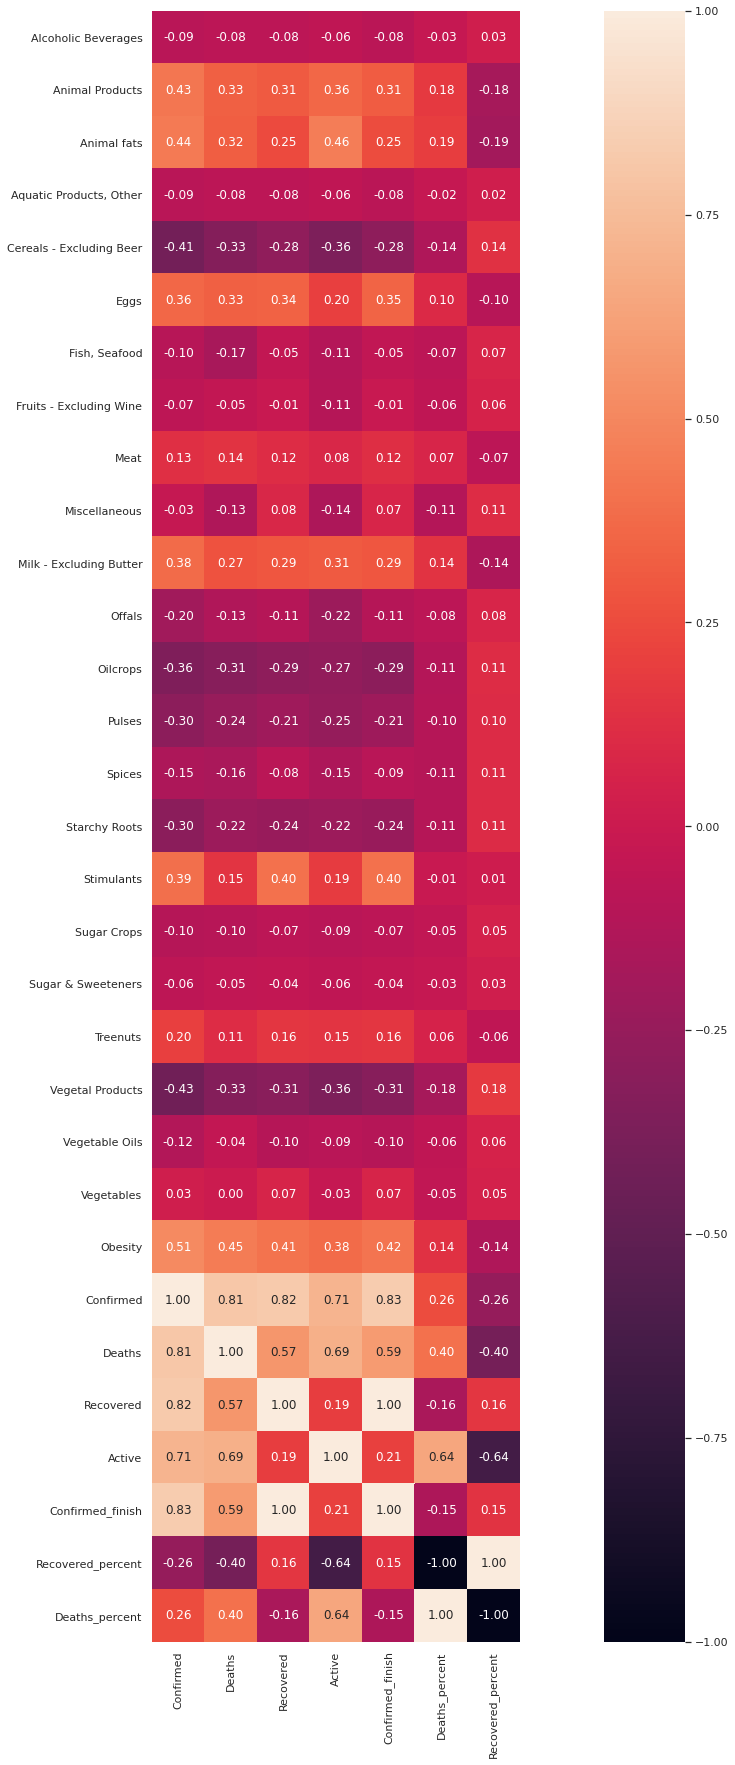

In [89]:
#Affichage
#plot correlation seaborn
from matplotlib import pyplot
import seaborn

a4_dims = (30, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=frame.drop(columns=(['Population','Country'])).corr().columns, xticklabels=matrix.columns)



In [90]:
frame

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active    Population  Confirmed_finish  Recovered_percent  Deaths_percent
0                           Afghanistan               0.0000          21.6397       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980       0.0000              0.0000    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  3.892800e+07          0.094893          95.546833        4.453167
1                               Albania               0.0000          32.0002       3.4172                   0.0000                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270       0.0000              0.0000    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660  2.838000e+06          0.523679          95.653344        4.346656
2                               Algeria               0.0000          14.4175       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886       0.0000              0.0000    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  4.435700e+07          0.109412          95.454545        4.545455
3                                Angola               0.0000          15.3041       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128       0.0000              0.0000    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  3.252200e+07          0.021386          95.226456        4.773544
4                   Antigua and Barbuda               0.0000          27.7033       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549       0.0000              0.0000    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163  9.800000e+04          0.133673          96.946565        3.053435
5                             Argentina               0.0000          30.3572       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366           19.6449         17.3147      0.1878     28.5   2.951577  0.080100   2.548591  0.322886  4.537700e+07          2.628691          96.952854        3.047146
6                               Armenia               0.0000          29.6642       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774  0.0103         0.0567      1.8002       0.0000              0.0000    0.9542           20.3384         12.8127      0.8717     20.9   4.075068  0.062212   2.708694  1.304161  2.956000e+06          2.770907          97

0.22527380142746942
[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144]


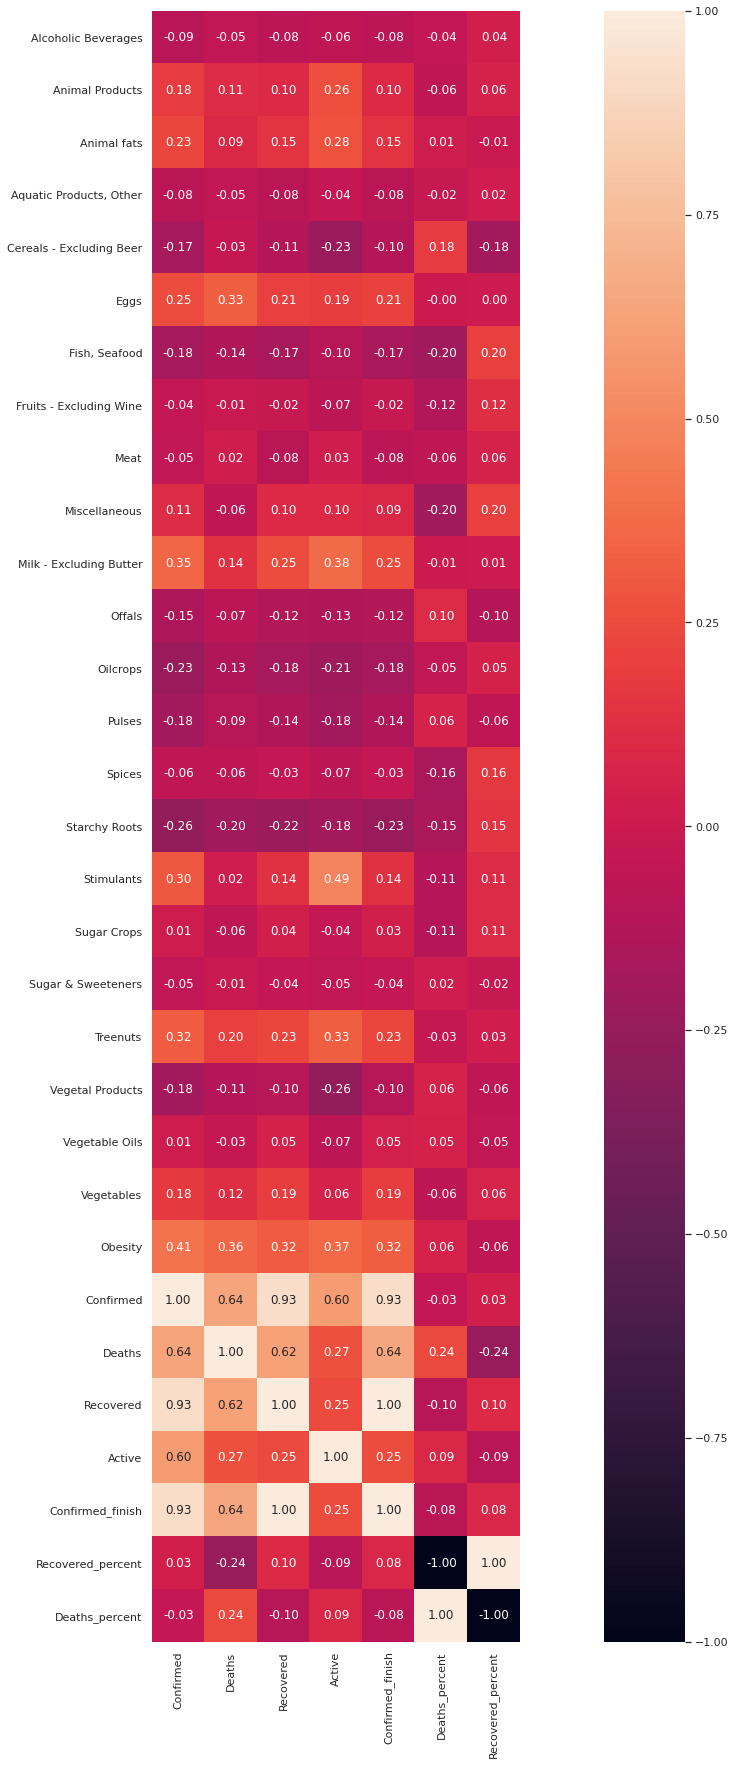

1.2017438112162646
[ 70 133 119  84  43  56  65   1  39  15  17  13 140  42  71 126  72  90
 157 135  67]


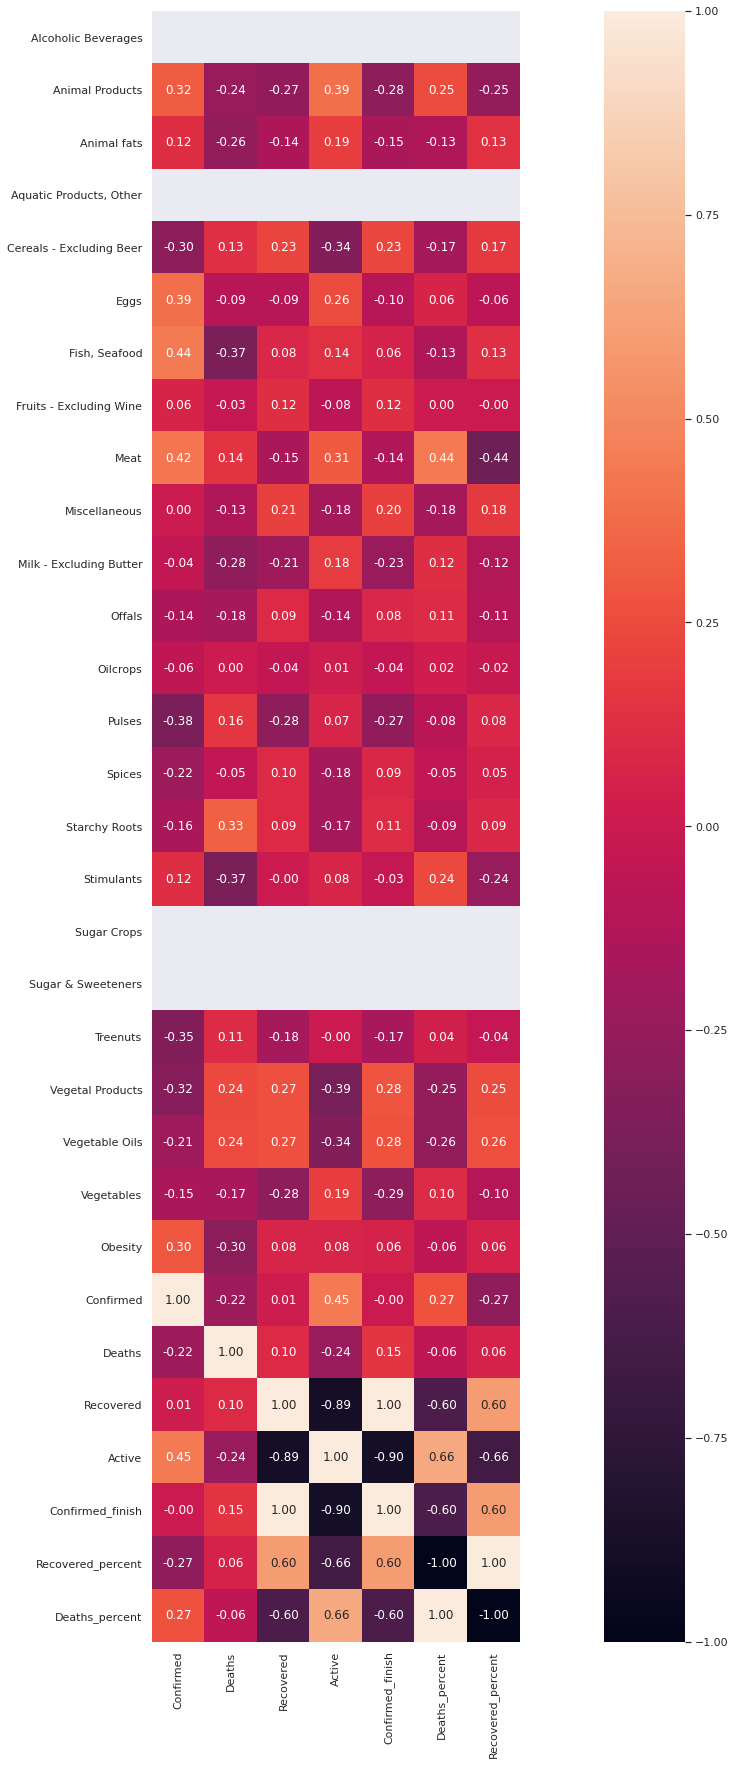

1.674014310529677
[ 77 158  21  66  87  97 137  23  10 145]


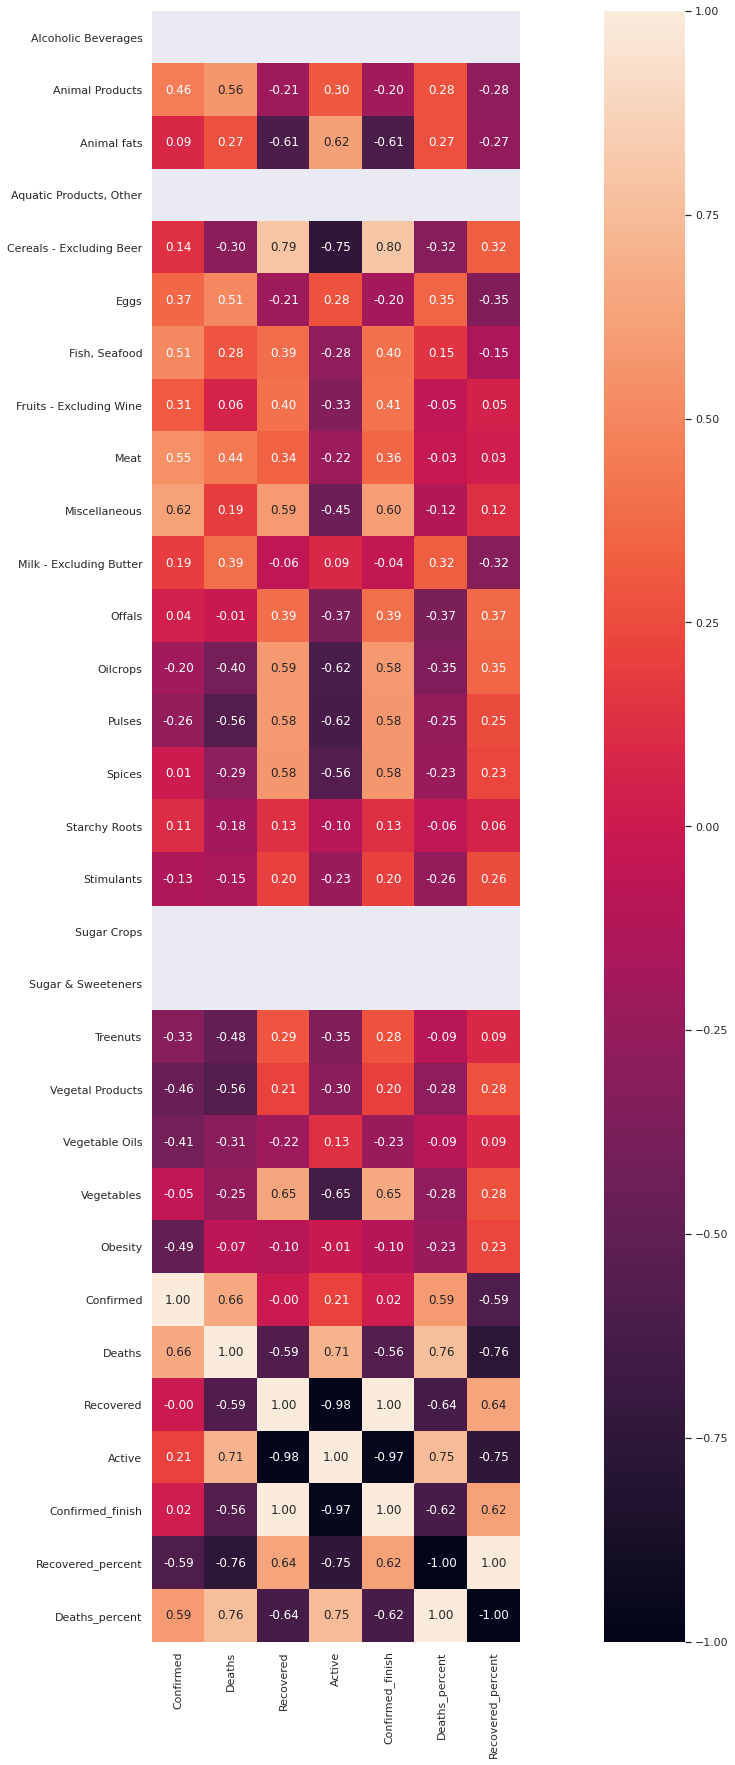

2.1755808136444674
[125 122  74 159  35  95 123  18]


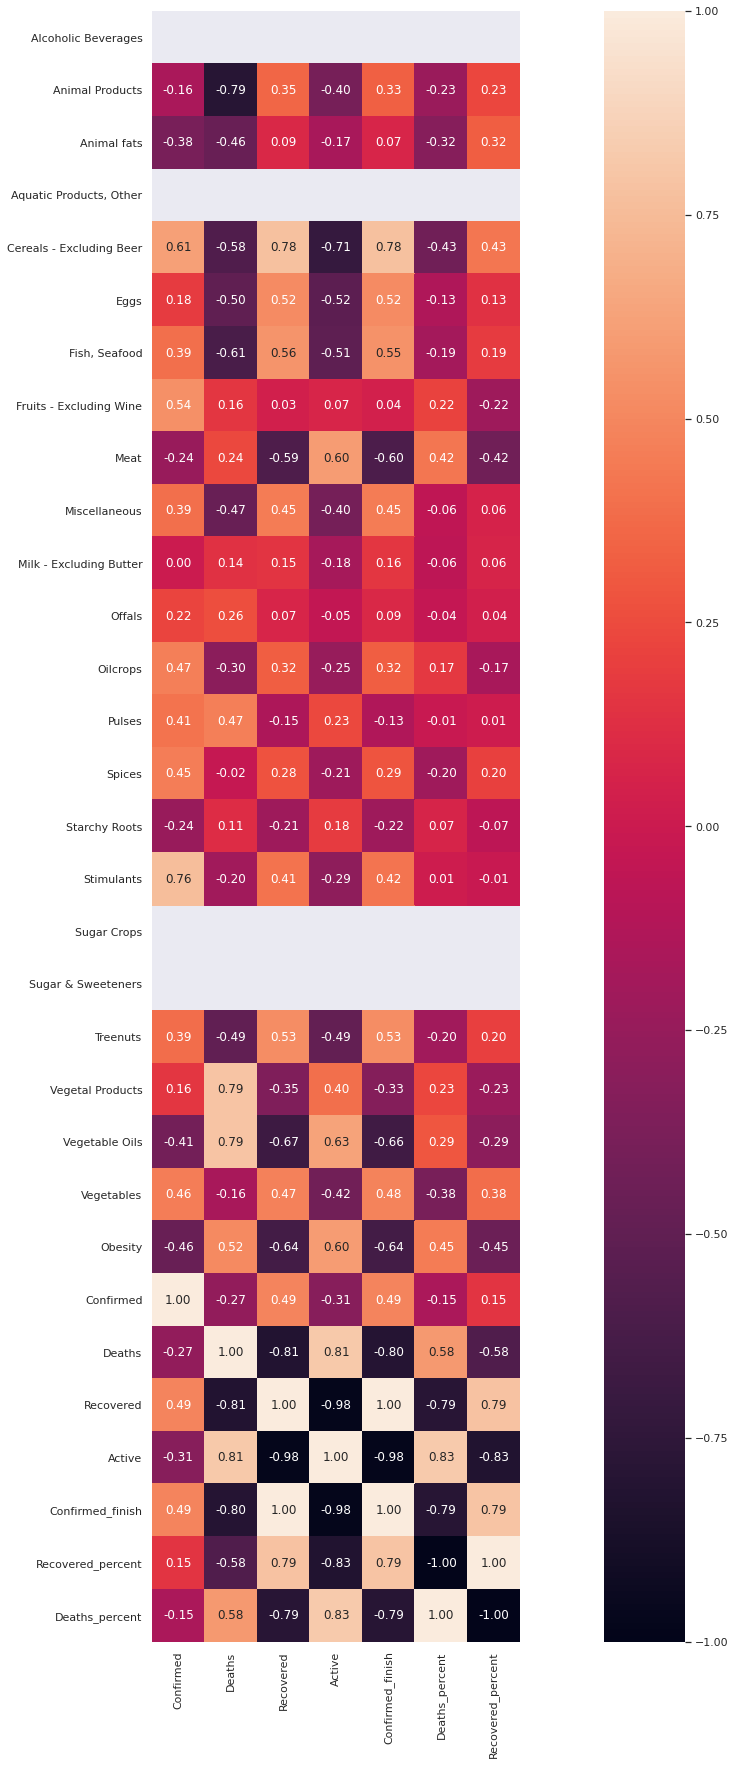

2.5729089386356727
[114  55  31  33   8 116 124 108 138  20]


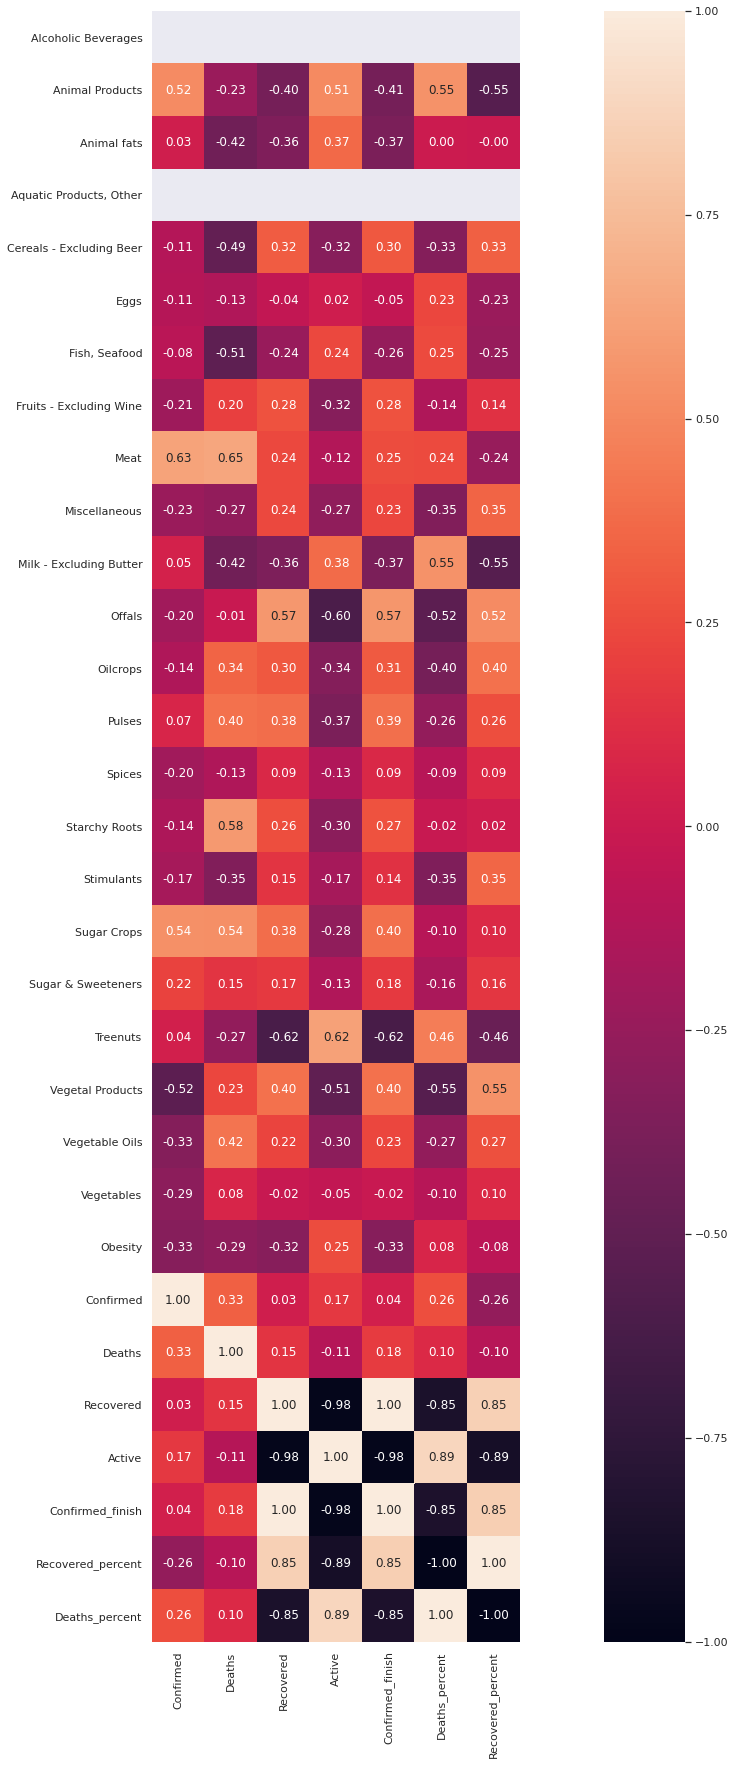

3.0791183691140103
[120  83   5 141 146  51]


KeyboardInterrupt: 

In [91]:
for ind in grouped_index:
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(ind)
    matrix = big_mat[data_covid]
    a4_dims = (30, 30)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(matrix, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=big_mat.columns, xticklabels=matrix.columns)
    plt.show()

In [92]:
frame_food = frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity","Spices",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])


In [93]:
frame_food.columns

Index(['Alcoholic Beverages', 'Animal fats', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous', 'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Recovered_percent'], dtype='object')

for i in frame_food.columns:
    print(i)
    frame_food[i].hist()
    plt.show()

In [94]:
#supprimer valeur abberante:
from scipy import stats
z_scores = stats.zscore(frame_food)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
frame_food = frame_food[filtered_entries]

for i in new_df.columns:
    print(i)
    new_df[i].hist()
    plt.show()

In [95]:
frame_food

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Recovered_percent
0                    0.0       6.2224                   0.0000                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960         0.0490      0.0980       0.0000              0.0000    0.7513         17.0831      0.3593          95.546833
2                    0.0       0.8972                   0.0000                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698         0.1129      0.2886       0.0000              0.0000    0.8595         27.3606      0.5145          95.454545
3                    0.0       1.3130                   0.0000                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282         0.7078      0.1128       0.0000              0.0000    0.0308         22.4638      0.1231          95.226456
4                    0.0       4.6686                   0.0000                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673         0.0449      1.0549       0.0000              0.0000    0.2020         14.4436      0.2469          96.946565
5                    0.0       3.3076                   0.0000                    1.3316  1.5706         0.1664                   0.2091  19.2693         0.0000                   5.8512  0.1878    0.0640  0.0213         0.1110      0.2475       0.0000              0.0000    0.1366         17.3147      0.1878          96.952854
6                    0.0       6.2619                   0.0000                    2.5068  1.6196         0.2218                   0.5468  10.8165         0.0361                  10.4709  0.2734    0.6602  0.0774         0.0567      1.8002       0.0000              0.0000    0.9542         12.8127      0.8717          97.754798
7                    0.0       4.6030                   0.0000                    0.9908  0.7017         0.4515                   0.4028  11.6002         0.0520                   6.5196  0.2339    1.2929  0.0260         0.0422      0.7926       0.0000              0.0000    1.6145         20.3612      0.2144          96.566215
8                    0.0      12.8517                   0.0000                    1.2297  1.2147         0.4259                   0.2249   8.1099         0.0000                   5.1497  0.0750    1.1367  0.0120         0.0450      0.4439       0.0000              0.0000    0.8398         17.9323      0.2039          98.581413
9                    0.0       7.7987                   0.0000                    5.4481  2.0197         0.2122                   0.5940  11.9993         0.0170                   9.9202  0.1612    0.1867  0.0255         0.1697      1.3663       0.0000              0.0000    2.2573          7.1538      0.6534          98.258399
11                   0.0       1.2369                   0.0000                    6.9946  1.2664         2.1646                   0.4270   1.8407         0.0147                   3.2249  0.1178    0.6332  0.5448         0.2209      0.0295       0.0147              0.0000    0.2651         29.6422      0.3092          98.262076
13                   0.0       7.8662                   0.0000                    4.8075  1.5772         0.5151                   0.2316  11.5636         0.0519                   2.0644  0.2316    0.4392  0.0000         0.1957      0.8385       0.0000              0.0000    1.0462         18.2119      0.3394          98.926397
15                   0.0       9.8102                   0

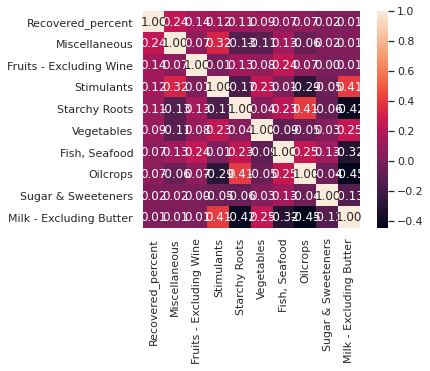

In [96]:
correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()


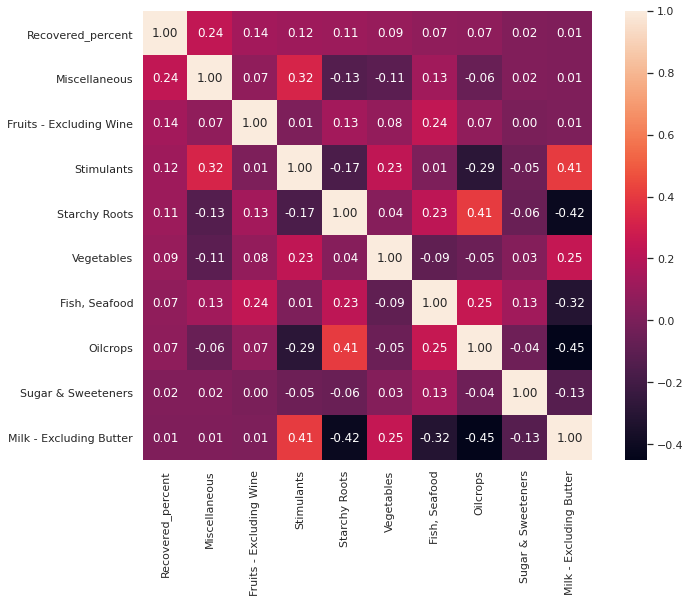

In [97]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


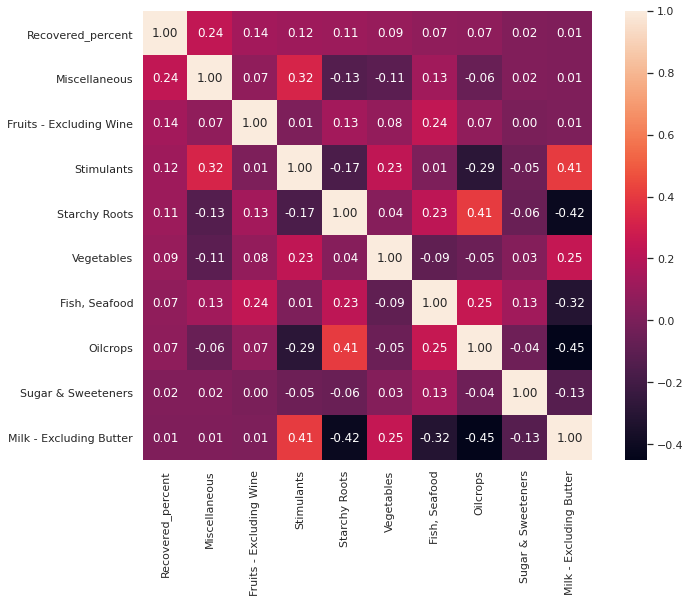

In [98]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation_map = np.corrcoef(frame_food[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)


In [28]:
frame_food[columns[0:7]]

Recovered_percent  Miscellaneous  Spices  Fruits - Excluding Wine  Stimulants  Vegetables  Starchy Roots
0            95.546833         0.0163  0.2776                   0.4246      0.0980      0.3593         0.0490
2            95.454545         0.0439  0.1568                   0.5772      0.2886      0.5145         0.1129
3            95.226456         0.0308  0.0103                   0.3488      0.1128      0.1231         0.7078
4            96.946565         0.0898  0.3591                   1.2177      1.0549      0.2469         0.0449
5            96.952854         0.0000  0.0213                   0.2091      0.2475      0.1878         0.1110
6            97.754798         0.0361  0.0103                   0.5468      1.8002      0.8717         0.0567
7            96.566215         0.0520  0.1007                   0.4028      0.7926      0.2144         0.0422
8            98.581413         0.0000  0.1020                   0.2249      0.4439      0.2039         0.0450
9            98.258399         0.0170  0.0170                   0.5940      1.3663      0.6534         0.1697
11           98.262076         0.0147  1.0602                   0.4270      0.0295      0.3092         0.2209
13           98.926397         0.0519  0.0160                   0.2316      0.8385      0.3394         0.1957
15           96.402878         0.1984  0.0496                   0.3039      0.8062      0.2108         0.0310
17           93.023238         0.0436  0.1483                   0.5407      0.7849      0.1919         0.4796
19           99.560826         0.1927  0.5472                   0.1696      0.7399      0.1850         0.1927
20           96.983249         0.0000  0.0080                   0.2528      0.1164      0.1204         0.1204
21           92.773493         0.0262  0.6179                   0.2723      0.1885      0.2461         0.0367
22           97.322835         0.0148  0.0960                   0.0443      0.0222      0.0665         0.0369
23           98.915311         0.1679  0.9709                   0.1898      0.4161      0.3066         0.0949
25           98.026706         0.0280  0.7465                   0.7931      0.1213      0.5505         0.5319
27           96.829391         0.0102  0.0102                   0.4998      0.0408      0.0918         1.0609
30           94.814199         0.1517  0.0676                   0.2344      0.9362      0.5763         0.0565
31           97.019781         0.0177  0.1239                   1.2273      0.2655      0.1829         0.2832
32           97.321198         0.0530  0.0106                   0.8370      0.5191      0.5827         1.0806
33           98.010673         0.0138  0.0414                   0.5700      0.4045      0.1701         0.0506
34           99.381028         0.0091  0.6089                   0.5271      1.9357      0.3272         1.2359
35           98.440886         0.0000  0.0655                   0.2577      2.6726      0.3930         0.0393
36           98.206217         0.0139  0.0417                   0.6179      0.1458      0.5554         0.3749
37           98.011639         0.1614  0.0538                   0.3632      1.9236      0.2601         0.0404
38           98.199373         0.0212  0.0635                   0.1870      0.9563      0.1729         0.0565
40           98.912656         0.1413  0.3159                   0.1247      0.5653      0.4572         0.0333
41          100.000000         0.1123  0.4680                   1.1856      1.7846      0.2309         0.4867
43           92.485506         0.0280  0.0392                   0.4367      0.1848      0.0840         0.0840
44           93.981430         0.0088  0.2376                   0.7216      0.0792      0.6600         0.1936
45           96.945593         0.1012  0.0311                   1.4321      0.3269      0.4514         0.1401
47           97.998318         0.1151  0.8170                   0.4718      0.0575      0.1956         0.3222
49           94.117647         0.0262  0.1312

In [99]:
X = frame_food[columns[0:7]]
Y = X[name_y].values

a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values

Y = normalized_d
ind = Y != 0 

X = X[ind,]
Y = Y[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d


X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)
normalized_d

Index(['Recovered_percent', 'Miscellaneous', 'Fruits - Excluding Wine', 'Stimulants', 'Starchy Roots', 'Vegetables', 'Fish, Seafood', 'Oilcrops', 'Sugar & Sweeteners', 'Milk - Excluding Butter'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Fruits - Excluding Wine', 'Stimulants', 'Starchy Roots', 'Vegetables', 'Fish, Seafood', 'Oilcrops', 'Sugar & Sweeteners', 'Milk - Excluding Butter'], dtype='object')


array([ 81.17334313,  80.7831803 ,  79.81888554,  87.09099135,
        87.11757891,  90.50795904,  85.48298553,  94.00264069,
        92.63703464,  92.65257875,  95.46112969,  84.79244484,
        93.06670044,  70.50433899,  78.95969983,  98.14330244,
        87.24608241,  69.44849516,  88.68174714,  95.41425913,
        91.65750242,  86.59561545,  78.07598808,  87.4005273 ,
        88.67482805,  91.58972248,  97.38317095,  93.40853505,
        92.41642142,  91.59380632,  92.38748744,  95.40303529,
       100.        ,  68.23097066,  74.55528961,  87.08688412,
        91.53748798,  75.13117451,  89.91221179,   0.        ,
        86.06001512,  95.23321421,  90.02770884,  77.64847702,
       100.        ,  84.55592353,  97.30467932,  74.95369202,
        62.61804236,  97.86867295,  93.46728602,  89.32145135,
        66.57167178,  96.35924655,  62.2778983 ,  82.41602682,
        91.40624379,  92.73064425,  89.15635456,  97.22781173,
        91.46829264,  65.80903508,  94.31681811,  75.41

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: -202.947656 (813.762081)
ScaledLASSO: -214.338015 (899.798373)
ScaledLASSO: -207.934518 (870.007051)
ScaledEN: -212.658310 (898.469383)
ScaledKNN: -215.583614 (646.214844)
ScaledCART: -472.545452 (1556.255493)


KeyboardInterrupt: 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(max_depth=np.array(list(range(1,10))))
#param_grid = dict(n_estimators=np.array(list(range(1,10))))
param_grid = dict(n_estimators=np.array(list(range(4,10))), max_depth=np.array(list(range(4,10))))
model = GradientBoostingRegressor(random_state=21)
#model = LinearRegression(random_state=21)
model = RandomForestRegressor()
#model = DecisionTreeRegressor()

kfold = KFold(n_splits=6, random_state=21)
kfold = LeaveOneOut()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X, Y)
#grid_result = grid.fit(X_train, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/home/brami/env2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KeyboardInterrupt: 

In [156]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
#model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model = LinearRegression()
model = RandomForestRegressor(n_estimators=9, max_depth=8)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.001)
#model = LinearRegression()

model.fit(X_train, Y_train)



# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
#predictions = model.predict(rescaled_X_test)
predictions = model.predict(X_test)
print (mean_squared_error(Y_test, predictions))
print (mean_squared_error(Y_train, model.predict(X_train)))


ValueError: X has 22 features, but this StandardScaler is expecting 9 features as input.

In [157]:
g=plt.scatter(Y_test, predictions)
#g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')



NameError: name 'predictions' is not defined

In [ ]:
denormalized(Y_train), denormalized(model.predict(X_train))

In [ ]:
for i, res in zip(model.predict(X_train), Y_train):
    print(i, res)

In [ ]:
Y_test

In [ ]:
Y.shape

# Arbre

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=4)
# Train Decision Tree Classifer

X = frame_food[columns[0:7]]
Y = X[name_y]
X = X.drop(name_y, axis = 1)


clf = clf.fit(X, Y)

#Predict the response for test dataset





from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=4)
x = frame.drop(columns=[name_y])
y = frame[name_y]
# Train Decision Tree Classifer
clf = clf.fit(x, y)

#Predict the response for test dataset





from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


# Meilleur regression avec groupby

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144]
0.22527380142746942
96
[1.         0.19717507 0.19567115 0.16467019 0.15164321 0.12001592
 0.10727722 0.10649767 0.06359358 0.05975919]


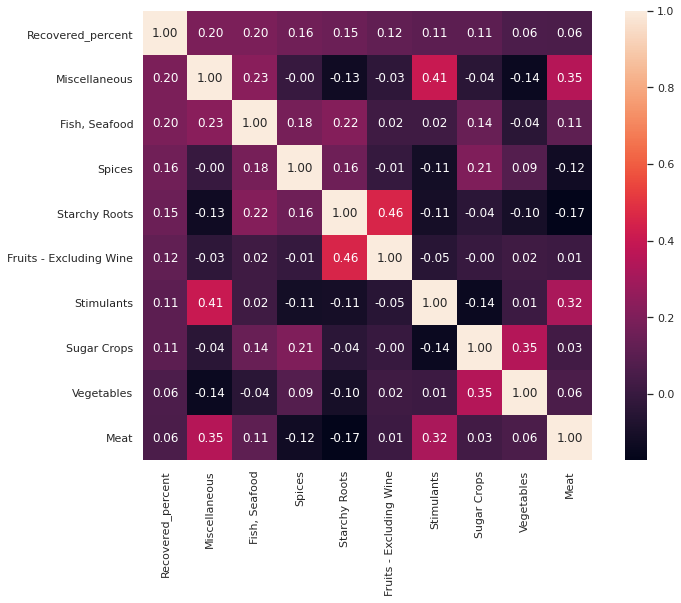

Index(['Recovered_percent', 'Miscellaneous', 'Fish, Seafood', 'Spices', 'Starchy Roots', 'Fruits - Excluding Wine', 'Stimulants', 'Sugar Crops', 'Vegetables', 'Meat'], dtype='object')
Index(['Recovered_percent', 'Miscellaneous', 'Fish, Seafood', 'Spices', 'Starchy Roots', 'Fruits - Excluding Wine', 'Stimulants', 'Sugar Crops', 'Vegetables', 'Meat'], dtype='object')
ScaledLR: -364.103984 (816.530418)
pred =  97.47034704514668 Y =  99.99999999999841
denormalized pred =  99.02558033675741 denormalized Y =  99.99999999999939

pred =  73.07619547777843 Y =  10.890121963903434
denormalized pred =  89.62897875559634 denormalized Y =  65.67496850469921

pred =  75.06845748379203 Y =  73.85905217232647
denormalized pred =  90.39639598935808 denormalized Y =  89.93053433269839

pred =  95.08177537400925 Y =  99.99999999999531
denormalized pred =  98.10550503593203 denormalized Y =  99.9999999999982

pred =  91.04750062460204 Y =  99.9999999999973
denormalized pred =  96.55150663658503 denormaliz

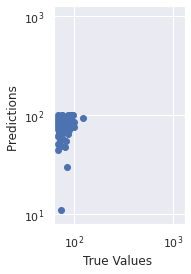

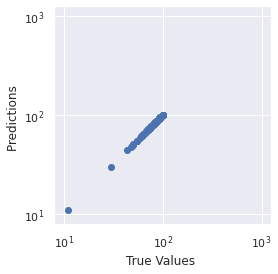

ScaledLASSO: -365.159471 (907.540640)
pred =  81.68195345999862 Y =  99.99999999999841
denormalized pred =  92.94390769827748 denormalized Y =  99.99999999999939

pred =  74.82251250390257 Y =  10.890121963903434
denormalized pred =  90.30165824123327 denormalized Y =  65.67496850469921

pred =  82.03354293436018 Y =  73.85905217232647
denormalized pred =  93.07933959479504 denormalized Y =  89.93053433269839

pred =  86.39116017454577 Y =  99.99999999999531
denormalized pred =  94.75788918222963 denormalized Y =  99.9999999999982

pred =  81.45570777229298 Y =  99.9999999999973
denormalized pred =  92.85675809682672 denormalized Y =  99.99999999999896

pred =  76.93637063937226 Y =  99.99999999999852
denormalized pred =  91.11591417644173 denormalized Y =  99.99999999999943

pred =  77.97970865771168 Y =  49.080069693659055
denormalized pred =  91.51780688608318 denormalized Y =  80.38569628839953

pred =  72.91616959145777 Y =  50.37287709701448
denormalized pred =  89.56733695213886

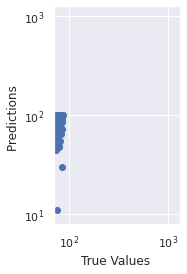

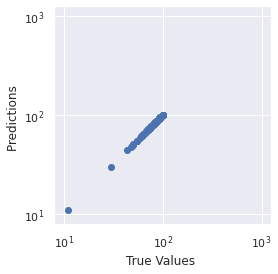

ScaledLASSO: -363.826515 (855.554097)
pred =  83.2797831962819 Y =  99.99999999999841
denormalized pred =  93.55939003571078 denormalized Y =  99.99999999999939

pred =  73.55816117423593 Y =  10.890121963903434
denormalized pred =  89.81463143603045 denormalized Y =  65.67496850469921

pred =  79.38914574643545 Y =  73.85905217232647
denormalized pred =  92.06072057340178 denormalized Y =  89.93053433269839

pred =  89.27450989685478 Y =  99.99999999999531
denormalized pred =  95.86855246907794 denormalized Y =  99.9999999999982

pred =  87.85370330351881 Y =  99.9999999999973
denormalized pred =  95.32125926051545 denormalized Y =  99.99999999999896

pred =  75.04679653034565 Y =  99.99999999999852
denormalized pred =  90.38805221282453 denormalized Y =  99.99999999999943

pred =  76.7773301698838 Y =  49.080069693659055
denormalized pred =  91.0546519545138 denormalized Y =  80.38569628839953

pred =  69.93046068009416 Y =  50.37287709701448
denormalized pred =  88.41724501309658 de

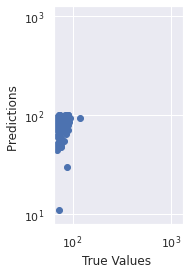

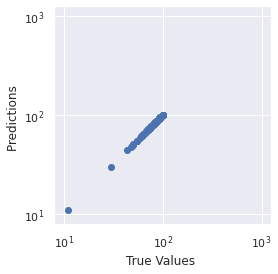

ScaledEN: -362.440756 (910.669407)
pred =  80.75557400697599 Y =  99.99999999999841
denormalized pred =  92.58706730524361 denormalized Y =  99.99999999999939

pred =  75.619642527356 Y =  10.890121963903434
denormalized pred =  90.60871188964927 denormalized Y =  65.67496850469921

pred =  82.24307971794246 Y =  73.85905217232647
denormalized pred =  93.16005294391412 denormalized Y =  89.93053433269839

pred =  84.01985593571304 Y =  99.99999999999531
denormalized pred =  93.84446527820518 denormalized Y =  99.9999999999982

pred =  80.5605963630765 Y =  99.9999999999973
denormalized pred =  92.51196212144998 denormalized Y =  99.99999999999896

pred =  77.66480205781303 Y =  99.99999999999852
denormalized pred =  91.39650519430867 denormalized Y =  99.99999999999943

pred =  77.77523143331828 Y =  49.080069693659055
denormalized pred =  91.43904247385346 denormalized Y =  80.38569628839953

pred =  73.60868146611739 Y =  50.37287709701448
denormalized pred =  89.83409179944022 denor

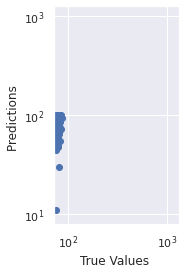

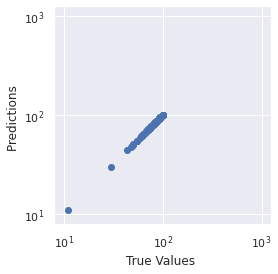

KeyboardInterrupt: 

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0
for ind in grouped_index:
    cpt += 1
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(ind)
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(len(frame.loc[ind]["Confirmed"]))
    
    current_frame = frame.loc[ind]
    frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products", "Obesity",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])

    a4_dims = (11.7, 8.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    correlation = frame_food.corr(method='pearson')
    columns = correlation.nlargest(10, name_y).index

    correlation_map = np.corrcoef(frame_food[columns].values.T)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
    print(correlation_map[0])
    plt.show(ax)

    
    
    X = frame_food[columns[0:]]
    Y = X[name_y].values

    a = 0
    b = 100
    print(columns)
    d = Y
    min_d = np.min(d)
    max_d = np.max(d)
    normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

    def denormalized(x):
        return (x / (b - a)) * (max_d - min_d) + min_d 



    X = X.drop(name_y, axis = 1).values

    Y = normalized_d
    ind = Y != 0 

    X = X[ind,]
    Y = Y[ind]


    a = 0
    b = 100
    print(columns)
    d = Y
    min_d = np.min(d)
    max_d = np.max(d)
    normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

    Y = normalized_d




    pipelines = []
    pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
    pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
    pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
    pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
    pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
    pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
    pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
    pipelines.append(('ScaledRFR', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


    results = []
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=10, random_state=21)
        kfold = LeaveOneOut()
        try:
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e:
            try :
                print("excemt",e, len(X))
                kfold = KFold(n_splits=int(len(X)/2), random_state=21)
                cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
            except Exception as e2:
                print("excemt",e2, len(X))
                model.fit(X_train, Y_train)
                class tmp(): 
                    content = {}
                cv_results = tmp()
                cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
                cv_results.std = lambda : -1

            
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        pred = []
        for ind in range(len(X)):
            dataX = np.delete(X, ind, axis=0)
            dataY = np.delete(Y, ind, axis=0)
            try:
                model.fit(dataX, dataY)
                pred.append(model.predict(X[ind].reshape(1, -1))[0])
            except:
                pred = [-1 for i in Y]
        for ind in range(len(pred)):
            print("pred = ", pred[ind], "Y = ", Y[ind])
            print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
            print()

        g=plt.scatter(pred, Y)
        #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

        g.axes.set_yscale('log')
        g.axes.set_xscale('log')
        g.axes.set_xlabel('True Values ')
        g.axes.set_ylabel('Predictions ')
        g.axes.axis('equal')
        g.axes.axis('square')
        plt.show(g)
            
        g=plt.scatter(Y, Y)
        #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

        g.axes.set_yscale('log')
        g.axes.set_xscale('log')
        g.axes.set_xlabel('True Values ')
        g.axes.set_ylabel('Predictions ')
        g.axes.axis('equal')
        g.axes.axis('square')
        plt.show(g)
        





[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144]
0.22527380142746942
96
[1.         0.19717507 0.19567115 0.16467019 0.15164321 0.12001592
 0.10727722 0.10649767 0.06359358 0.05975919]


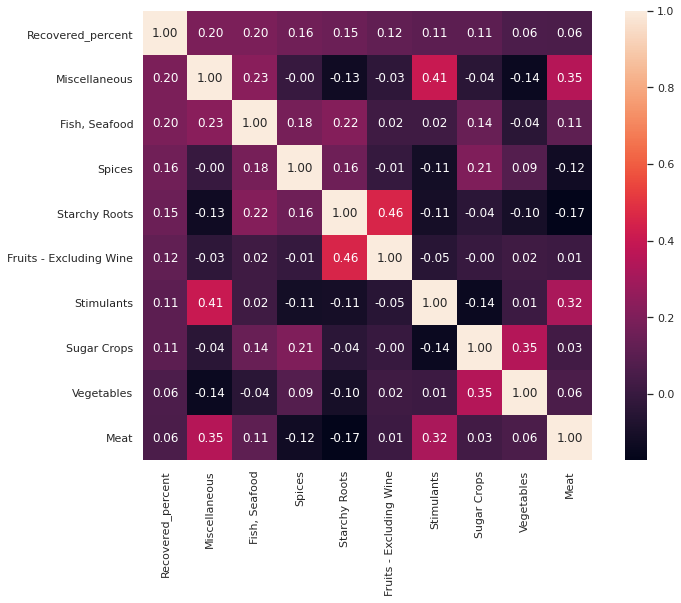

[ 70 133 119  84  43  56  65   1  39  15  17  13 140  42  71 126  72  90
 157 135  67]
1.2017438112162646
21
[1.         0.26069193 0.17550413 0.17348786 0.13412723 0.12518774
 0.0891376  0.08427603 0.05689458 0.04785217]


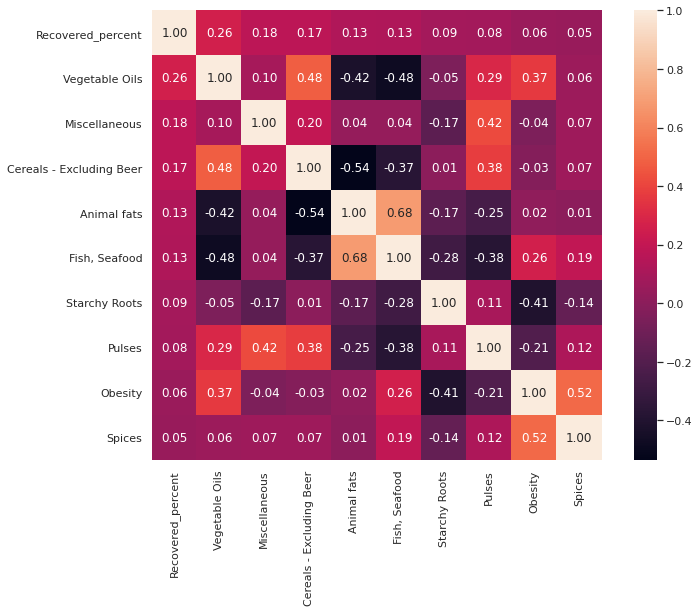

[ 77 158  21  66  87  97 137  23  10 145]
1.674014310529677
10
[1.         0.37274519 0.35270524 0.32325197 0.27873454 0.25634262
 0.25097716 0.23142781 0.22976562 0.12490945]


KeyboardInterrupt: 

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0
for ind in grouped_index:
    cpt += 1
    big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
    print(ind)
    print(np.mean(frame.loc[ind]["Confirmed"]))
    print(len(frame.loc[ind]["Confirmed"]))
    
    current_frame = frame.loc[ind]
    frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                                 "Vegetal Products", "Animal Products",
                                 "Confirmed_finish", "Recovered", "Deaths_percent"])
    a4_dims = (11.7, 8.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    correlation = frame_food.corr(method='pearson')
    columns = correlation.nlargest(10, name_y).index

    correlation_map = np.corrcoef(frame_food[columns].values.T)
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
    print(correlation_map[0])
    plt.show(ax)

    
    
        





In [242]:
# en gardant les valeur au dessus 1

[ 77 158  21  66  87  97 137  23  10 145 125 122  74 159  35  95 123  18
 114  55  31  33   8 116 124 108 138  20 120  83   5 141 146  51 161 118
  73   6  38  91 102  14]
2.650496093329261
42
[1.         0.29745324 0.22354281 0.19527568 0.17612217 0.17419371
 0.16669149 0.1297309  0.1194049  0.11737401]


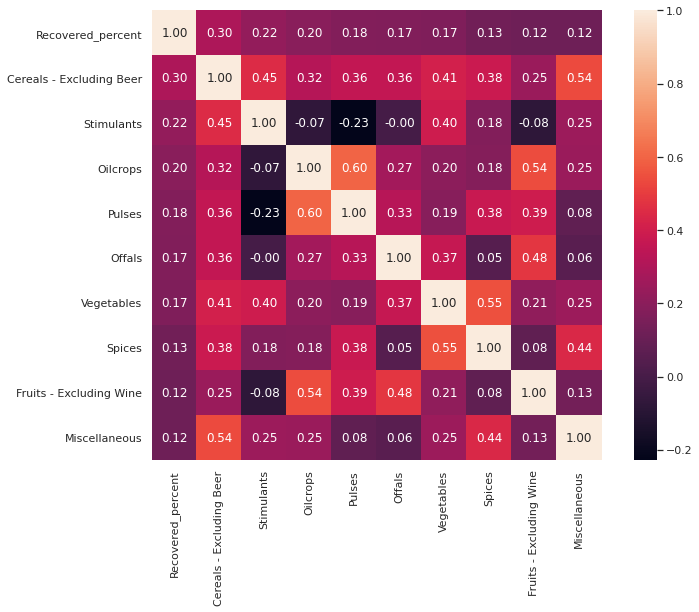

Index(['Recovered_percent', 'Cereals - Excluding Beer', 'Stimulants', 'Oilcrops', 'Pulses', 'Offals', 'Vegetables', 'Spices', 'Fruits - Excluding Wine', 'Miscellaneous'], dtype='object')
Index(['Recovered_percent', 'Cereals - Excluding Beer', 'Stimulants', 'Oilcrops', 'Pulses', 'Offals', 'Vegetables', 'Spices', 'Fruits - Excluding Wine', 'Miscellaneous'], dtype='object')
ScaledLR: -415.352715 (1471.271791)
pred =  103.84597874400353 Y =  98.23152668592834
denormalized pred =  103.62721876133082 denormalized Y =  98.33211777529581

pred =  84.76194515921576 Y =  100.0
denormalized pred =  85.62868853842272 denormalized Y =  100.0

pred =  92.8054728189415 Y =  92.70399663961032
denormalized pred =  93.2146988563762 denormalized Y =  93.11899466090398

pred =  85.86106843573796 Y =  90.98453378680796
denormalized pred =  86.66529347957919 denormalized Y =  91.4973351733625

pred =  94.37488146360668 Y =  98.96421960830335
denormalized pred =  94.69483924690749 denormalized Y =  99.023134

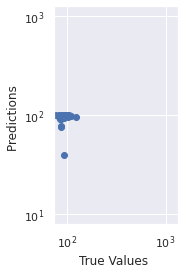

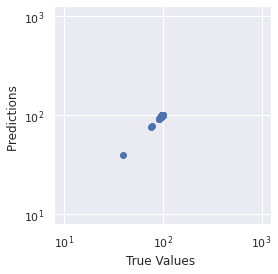

ScaledLASSO: -332.070146 (1412.873471)
pred =  96.77529418638484 Y =  98.23152668592834
denormalized pred =  96.95871604980803 denormalized Y =  98.33211777529581

pred =  94.13474673284051 Y =  100.0
denormalized pred =  94.46836342406519 denormalized Y =  100.0

pred =  90.11180619900816 Y =  92.70399663961032
denormalized pred =  90.6742484922585 denormalized Y =  93.11899466090398

pred =  87.81901784260825 Y =  90.98453378680796
denormalized pred =  88.5118743618603 denormalized Y =  91.4973351733625

pred =  91.35110049011189 Y =  98.96421960830335
denormalized pred =  91.84305149474787 denormalized Y =  99.02313498865837

pred =  100.94604717785484 Y =  98.6512968872773
denormalized pred =  100.89223583930865 denormalized Y =  98.72801136991188

pred =  90.3184412748562 Y =  98.70677700380509
denormalized pred =  90.86913012675365 denormalized Y =  98.78033576714478

pred =  101.91801617533494 Y =  99.24048373409184
denormalized pred =  101.80891906034532 denormalized Y =  99.28

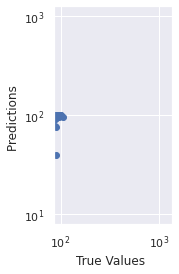

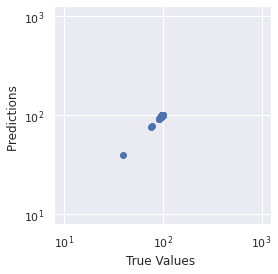

ScaledLASSO: -360.992285 (1438.341520)
pred =  100.87676474893578 Y =  98.23152668592834
denormalized pred =  100.82689420776748 denormalized Y =  98.33211777529581

pred =  95.95921114114716 Y =  100.0
denormalized pred =  96.18905195920291 denormalized Y =  100.0

pred =  90.88108361975257 Y =  92.70399663961032
denormalized pred =  91.3997692709531 denormalized Y =  93.11899466090398

pred =  86.28192016053899 Y =  90.98453378680796
denormalized pred =  87.06220708039322 denormalized Y =  91.4973351733625

pred =  93.50961101926228 Y =  98.96421960830335
denormalized pred =  93.87878554555917 denormalized Y =  99.02313498865837

pred =  103.8898449172976 Y =  98.6512968872773
denormalized pred =  103.66858981857033 denormalized Y =  98.72801136991188

pred =  89.44803963886092 Y =  98.70677700380509
denormalized pred =  90.04823709688509 denormalized Y =  98.78033576714478

pred =  105.06166277557662 Y =  99.24048373409184
denormalized pred =  104.77375446022083 denormalized Y =  99

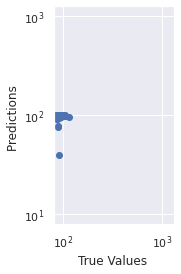

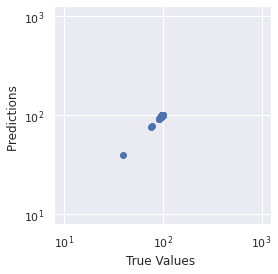

ScaledEN: -330.368738 (1419.558192)
pred =  96.69922910084773 Y =  98.23152668592834
denormalized pred =  96.88697756041242 denormalized Y =  98.33211777529581

pred =  94.7593987937894 Y =  100.0
denormalized pred =  95.05748516019295 denormalized Y =  100.0

pred =  90.83215283380319 Y =  92.70399663961032
denormalized pred =  91.35362167716335 denormalized Y =  93.11899466090398

pred =  88.22964650238838 Y =  90.98453378680796
denormalized pred =  88.89914638748365 denormalized Y =  91.4973351733625

pred =  92.27766641064645 Y =  98.96421960830335
denormalized pred =  92.71691417425768 denormalized Y =  99.02313498865837

pred =  99.36348842583578 Y =  98.6512968872773
denormalized pred =  99.39969332196327 denormalized Y =  98.72801136991188

pred =  90.44576260265808 Y =  98.70677700380509
denormalized pred =  90.98920939386883 denormalized Y =  98.78033576714478

pred =  100.08851233779933 Y =  99.24048373409184
denormalized pred =  100.08347773964576 denormalized Y =  99.28368

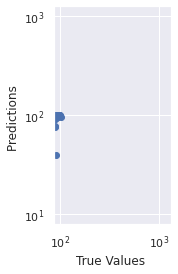

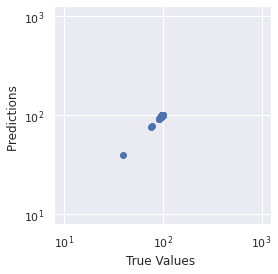

ScaledKNN: -353.864996 (1299.802414)
pred =  98.63291950580128 Y =  98.23152668592834
denormalized pred =  98.71067929729503 denormalized Y =  98.33211777529581

pred =  97.34009415729427 Y =  100.0
denormalized pred =  97.49139009385362 denormalized Y =  100.0

pred =  93.21808567925594 Y =  92.70399663961032
denormalized pred =  93.6038422208403 denormalized Y =  93.11899466090398

pred =  91.96553538451404 Y =  90.98453378680796
denormalized pred =  92.42253721865279 denormalized Y =  91.4973351733625

pred =  95.94018863256919 Y =  98.96421960830335
denormalized pred =  96.17111145443303 denormalized Y =  99.02313498865837

pred =  98.77509837584901 Y =  98.6512968872773
denormalized pred =  98.8447710069037 denormalized Y =  98.72801136991188

pred =  93.12628629471021 Y =  98.70677700380509
denormalized pred =  93.5172644022754 denormalized Y =  98.78033576714478

pred =  98.32398201662261 Y =  99.24048373409184
denormalized pred =  98.41931422967099 denormalized Y =  99.28368515

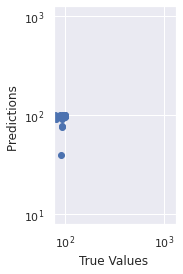

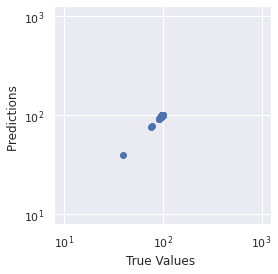

ScaledCART: -355.080001 (1072.830510)
pred =  98.27771466428167 Y =  98.23152668592834
denormalized pred =  98.37567857289315 denormalized Y =  98.33211777529581

pred =  92.70399663961032 Y =  100.0
denormalized pred =  93.11899466090398 denormalized Y =  100.0

pred =  99.1182212176889 Y =  92.70399663961032
denormalized pred =  99.16837695800345 denormalized Y =  93.11899466090398

pred =  98.88513021203889 Y =  90.98453378680796
denormalized pred =  98.94854421188924 denormalized Y =  91.4973351733625

pred =  98.23152668592834 Y =  98.96421960830335
denormalized pred =  98.33211777529581 denormalized Y =  99.02313498865837

pred =  98.73557313070803 Y =  98.6512968872773
denormalized pred =  98.80749396502063 denormalized Y =  98.72801136991188

pred =  96.9555108465053 Y =  98.70677700380509
denormalized pred =  97.12868195295101 denormalized Y =  98.78033576714478

pred =  100.0 Y =  99.24048373409184
denormalized pred =  100.0 denormalized Y =  99.28368515984823

pred =  92.703

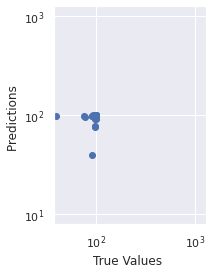

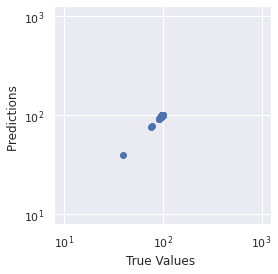

ScaledGBM: -324.504119 (1314.456352)
pred =  98.27146396190393 Y =  98.23152668592834
denormalized pred =  98.36978341162339 denormalized Y =  98.33211777529581

pred =  94.50436205347464 Y =  100.0
denormalized pred =  94.81695495686284 denormalized Y =  100.0

pred =  98.89645506755288 Y =  92.70399663961032
denormalized pred =  98.95922490752591 denormalized Y =  93.11899466090398

pred =  98.55071308976846 Y =  90.98453378680796
denormalized pred =  98.63314879741878 denormalized Y =  91.4973351733625

pred =  98.67170847264349 Y =  98.96421960830335
denormalized pred =  98.74726194052519 denormalized Y =  99.02313498865837

pred =  98.25404158858474 Y =  98.6512968872773
denormalized pred =  98.35335202612265 denormalized Y =  98.72801136991188

pred =  99.14576357219231 Y =  98.70677700380509
denormalized pred =  99.19435269828591 denormalized Y =  98.78033576714478

pred =  99.35155784973625 Y =  99.24048373409184
denormalized pred =  99.38844135924009 denormalized Y =  99.28368

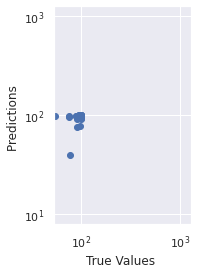

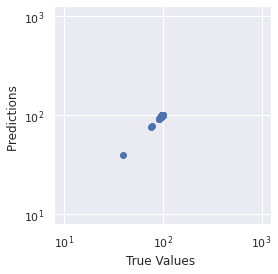

ScaledGBM: -319.032915 (1427.145631)
pred =  98.57550234222052 Y =  98.23152668592834
denormalized pred =  98.65652803260403 denormalized Y =  98.33211777529581

pred =  94.94355415869562 Y =  100.0
denormalized pred =  95.2311657338646 denormalized Y =  100.0

pred =  96.63397318481701 Y =  92.70399663961032
denormalized pred =  96.82543341296139 denormalized Y =  93.11899466090398

pred =  84.36481512674655 Y =  90.98453378680796
denormalized pred =  85.25414733569087 denormalized Y =  91.4973351733625

pred =  96.92833634795333 Y =  98.96421960830335
denormalized pred =  97.10305314490543 denormalized Y =  99.02313498865837

pred =  96.67459230633649 Y =  98.6512968872773
denormalized pred =  96.8637421113321 denormalized Y =  98.72801136991188

pred =  97.02273664744222 Y =  98.70677700380509
denormalized pred =  97.19208393789023 denormalized Y =  98.78033576714478

pred =  97.49469982663655 Y =  99.24048373409184
denormalized pred =  97.63720176411331 denormalized Y =  99.2836851

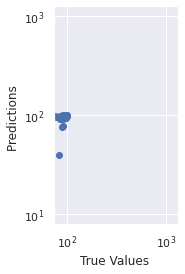

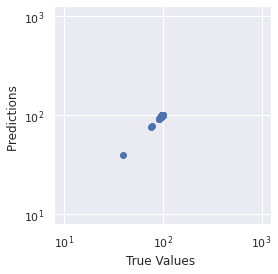

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[1:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products", "Obesity",
                             "Confirmed_finish", "Recovered", "Deaths_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
Y = X[name_y].values

a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values

Y = normalized_d
ind = Y != 0 

X = X[ind,]
Y = Y[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d




pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    try:
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    except Exception as e:
        try :
            print("excemt",e, len(X))
            kfold = KFold(n_splits=int(len(X)/2), random_state=21)
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e2:
            print("excemt",e2, len(X))
            model.fit(X_train, Y_train)
            class tmp(): 
                content = {}
            cv_results = tmp()
            cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
            cv_results.std = lambda : -1


    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    pred = []
    for ind in range(len(X)):
        dataX = np.delete(X, ind, axis=0)
        dataY = np.delete(Y, ind, axis=0)
        try:
            model.fit(dataX, dataY)
            pred.append(model.predict(X[ind].reshape(1, -1))[0])
        except:
            pred = [-1 for i in Y]
    for ind in range(len(pred)):
        print("pred = ", pred[ind], "Y = ", Y[ind])
        print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
        print()

    g=plt.scatter(pred, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)

    g=plt.scatter(Y, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)






In [244]:
#En gardant les tout

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[0:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products", "Obesity",
                             "Confirmed_finish", "Recovered", "Deaths_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
Y = X[name_y].values
ind = Y> 90
Y = Y[ind]
X = X[ind]
a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values

Y = normalized_d
ind = Y != 0 

X = X[ind,]
Y = Y[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

Y = normalized_d




pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    try:
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    except Exception as e:
        try :
            print("excemt",e, len(X))
            kfold = KFold(n_splits=int(len(X)/2), random_state=21)
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e2:
            print("excemt",e2, len(X))
            model.fit(X_train, Y_train)
            class tmp(): 
                content = {}
            cv_results = tmp()
            cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
            cv_results.std = lambda : -1


    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    pred = []
    for ind in range(len(X)):
        dataX = np.delete(X, ind, axis=0)
        dataY = np.delete(Y, ind, axis=0)
        try:
            model.fit(dataX, dataY)
            pred.append(model.predict(X[ind].reshape(1, -1))[0])
        except:
            pred = [-1 for i in Y]
    for ind in range(len(pred)):
        print("pred = ", pred[ind], "Y = ", Y[ind])
        print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
        print()

    g=plt.scatter(pred, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)

    g=plt.scatter(Y, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)






ValueError: need at least one array to concatenate

layer_normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=[1,])
layer_normalizer.adapt(Y)
ty = tf.linalg.normalize(
    Y,
)[0].numpy()
ty.shape

In [283]:
def normalized_d2(a, b, data):
    a = a
    b = b
    d = data
    min_d = np.min(d)
    max_d = np.max(d)
    return  (b - a) * ((d - min_d) / (max_d - min_d)) + a, a, b, min_d, max_d

def denormalized2(a, b, min_d, max_d, x):
    return (x / (b - a)) * (max_d - min_d) + min_d 




In [284]:
ty, a2, b2, min_d2, max_d2 = normalized_d2(0, 1, Y)

denormalized2(a, b, min_d, max_d, ty)

array([1.89269315, 1.55424439, 1.89269315, 1.89269315, 1.89269315,
       1.2334291 , 1.25016717, 1.71582589, 1.3114951 , 1.16614862,
       1.59265014, 1.89269315, 1.38684938, 1.70889375, 1.45550065,
       1.24091011, 1.5236977 , 1.89269315, 1.68454384, 1.55979744,
       1.89269315, 1.68691888, 1.63970243, 1.75068239, 1.79225588,
       1.35769871, 1.78908939, 1.68283718, 1.54631605, 1.72633095,
       1.69165508, 1.89269315, 1.82332191, 1.56977494, 1.83159037,
       1.67153639, 1.48621716, 1.57378087, 1.62162342, 1.6559199 ,
       1.89269315, 1.6587594 , 1.5182592 , 1.69236631, 1.53116125,
       1.82124112, 1.5373475 , 1.50785207, 1.21816259, 1.39360492,
       1.67319164, 1.80656644, 1.68577086, 1.60523182, 1.55047975,
       1.52314892, 1.79665282, 1.38326184, 1.81886493, 1.64942712,
       1.65025136, 1.47687479, 1.79468225, 1.69791553, 1.59246672,
       1.79042853, 1.42654804, 1.62526934, 1.65962303, 1.84347273,
       1.82058729, 1.66726662, 1.70111214, 1.53799064, 1.77464

In [285]:
import tensorflow as tf
from tensorflow.keras.models import Model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=2),
    tf.keras.layers.Dense(units=1)
])
model.build(X.shape)
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    metrics='mean_squared_error',
    loss='mean_squared_error')

model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (147, 20)                 200       
_________________________________________________________________
dense_87 (Dense)             (147, 10)                 210       
_________________________________________________________________
dense_88 (Dense)             (147, 2)                  22        
_________________________________________________________________
dense_89 (Dense)             (147, 1)                  3         
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [286]:
model.optimizer.lr.assign(0.01)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.01>

In [287]:
ty, a2, b2, min_d2, max_d2 = normalized_d2(0, 1, Y)


for i in range(100):
    model.fit(X, ty)

5/5 [==============================] - 0s 3ms/step - loss: 0.0388 - mean_squared_error: 0.0388


In [291]:
from sklearn.metrics import mean_squared_error
mean_squared_error(denormalized2(a2, b2, min_d2, max_d2, model.predict(X)),Y)

380.06799991757237

In [292]:
list(zip(denormalized2(a2, b2, min_d2, max_d2, model.predict(X)), Y))

[(array([78.281715], dtype=float32), 99.99999999999793),
 (array([68.67974], dtype=float32), 65.84716471555303),
 (array([79.78753], dtype=float32), 99.99999999999389),
 (array([86.79099], dtype=float32), 99.99999999999646),
 (array([73.89319], dtype=float32), 99.99999999999808),
 (array([69.08859], dtype=float32), 33.47372084928904),
 (array([58.63854], dtype=float32), 35.162758239684266),
 (array([78.09335], dtype=float32), 82.15233962816178),
 (array([70.21427], dtype=float32), 41.35135421955533),
 (array([58.64066], dtype=float32), 26.684453593216396),
 (array([62.08136], dtype=float32), 69.72268555188758),
 (array([62.155224], dtype=float32), 99.99999999999228),
 (array([62.5007], dtype=float32), 48.95534855177195),
 (array([84.83068], dtype=float32), 81.45281843661996),
 (array([70.38118], dtype=float32), 55.882941923251195),
 (array([67.85476], dtype=float32), 34.22862898149476),
 (array([73.040436], dtype=float32), 62.76470049315095),
 (array([85.6095], dtype=float32), 99.99999

In [293]:
list(zip(denormalized(denormalized2(a2, b2, min_d2, max_d2, model.predict(X))), denormalized(Y)))

[(array([78.47755], dtype=float32), 99.99999999999794),
 (array([68.96216], dtype=float32), 66.15512433251325),
 (array([79.96979], dtype=float32), 99.99999999999395),
 (array([86.910095], dtype=float32), 99.99999999999649),
 (array([74.1286], dtype=float32), 99.9999999999981),
 (array([69.367325], dtype=float32), 34.07359512837624),
 (array([59.011497], dtype=float32), 35.7474022954695),
 (array([78.29089], dtype=float32), 82.31327381139928),
 (array([70.48285], dtype=float32), 41.88019507096208),
 (array([59.0136], dtype=float32), 27.345547391157805),
 (array([62.42328], dtype=float32), 69.995699200165),
 (array([62.49647], dtype=float32), 99.99999999999235),
 (array([62.838837], dtype=float32), 49.41562340675662),
 (array([84.96747], dtype=float32), 81.62006027415347),
 (array([70.64826], dtype=float32), 56.28074995861845),
 (array([68.14462], dtype=float32), 34.82169617656396),
 (array([73.28353], dtype=float32), 63.10045500600542),
 (array([85.73926], dtype=float32), 99.9999999999

In [294]:
denormalized(Y)

array([100.        ,  66.15512433, 100.        , 100.        ,
       100.        ,  34.07359513,  35.7474023 ,  82.31327381,
        41.88019507,  27.34554739,  69.9956992 , 100.        ,
        49.41562341,  81.62006027,  56.28074996,  34.82169618,
        63.10045501, 100.        ,  79.18506946,  66.71042922,
       100.        ,  79.42257343,  74.70092815,  85.79892444,
        89.95627341,  46.50055656,  89.63962425,  79.01440278,
        65.3622903 ,  83.36377979,  79.89619285, 100.        ,
        93.06287578,  67.70817923,  93.88972243,  77.88432456,
        59.35240138,  68.10877163,  72.89302714,  76.32267508,
       100.        ,  76.60662464,  62.55660528,  79.96731586,
        63.84681023,  92.85479716,  64.46543552,  61.5158917 ,
        32.54694398,  50.09117725,  78.04984907,  91.38732875,
        79.30777073,  71.25386722,  65.77866007,  63.04557738,
        90.3959671 ,  49.05686896,  92.61717845,  75.67339707,
        75.7558208 ,  58.41816458,  90.19891045,  80.52

In [ ]:
#Gardant X > 90

[ 85 160 166  24 139 150  49 112 149  30 167  28  22 101  96  16 136  89
  93  59 113 151 143 128 156  99 110 127   3 104  82 169  92  36 130  34
  64 142  25 111  12  48 168  41 134  88  76 129  61  27   7  44   0 162
 148  62  79   4  54  94   2  57 117  98  69 163  11  32 165  75  50 121
  19  53 152 132 154 106  47  45 115  40  86  46  63  37  68  60  78 153
 107  58 100   9 103 144  70 133 119  84  43  56  65   1  39  15  17  13
 140  42  71 126  72  90 157 135  67  77 158  21  66  87  97 137  23  10
 145 125 122  74 159  35  95 123  18 114  55  31  33   8 116 124 108 138
  20 120  83   5 141 146  51 161 118  73   6  38  91 102  14]
0.9948662949208024
159
[1.         0.13852955 0.11407582 0.11372651 0.10703984 0.10642413
 0.10194666 0.07527633 0.07415673 0.05780105]


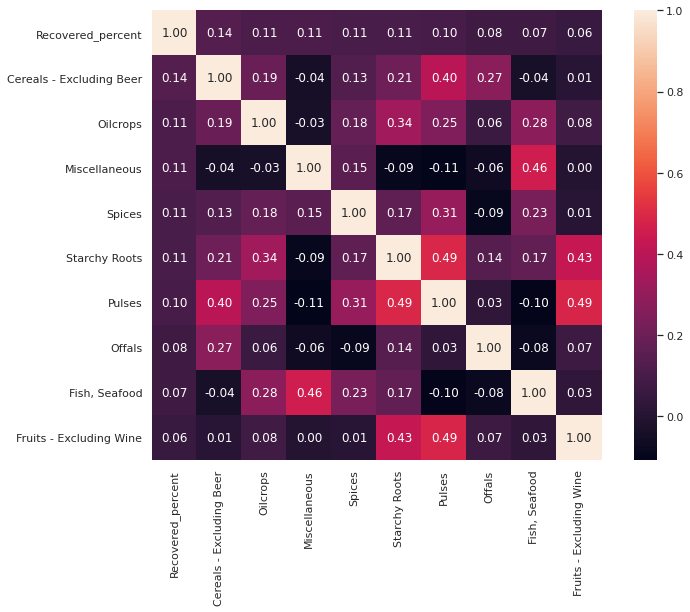

Index(['Recovered_percent', 'Cereals - Excluding Beer', 'Oilcrops', 'Miscellaneous', 'Spices', 'Starchy Roots', 'Pulses', 'Offals', 'Fish, Seafood', 'Fruits - Excluding Wine'], dtype='object')
a, b, min_d, max_d 0 100 91.07739463022281 100.00000000000017
ScaledLR: -1.030922 (1.722847)
pred =  [0.19959502] Y =  [1.15539397]
denormalized pred =  [91.09520371] denormalized Y =  [91.18048587]

pred =  [-0.32367896] Y =  [-0.44932335]
denormalized pred =  [91.04851403] denormalized Y =  [91.03730328]

pred =  [0.19655233] Y =  [1.15539397]
denormalized pred =  [91.09493222] denormalized Y =  [91.18048587]

pred =  [0.31945197] Y =  [1.15539397]
denormalized pred =  [91.10589807] denormalized Y =  [91.18048587]

pred =  [-0.07608058] Y =  [1.15539397]
denormalized pred =  [91.07060626] denormalized Y =  [91.18048587]

pred =  [-0.30343162] Y =  [-1.97043354]
denormalized pred =  [91.05032062] denormalized Y =  [90.90158062]

pred =  [-0.55916271] Y =  [-1.89107182]
denormalized pred =  [91.0

denormalized pred =  [91.02854299] denormalized Y =  [91.10656223]

pred =  [2.41356933] Y =  [0.94656871]
denormalized pred =  [91.2927479] denormalized Y =  [91.16185322]

pred =  [-0.49309952] Y =  [-0.0713027]
denormalized pred =  [91.03339731] denormalized Y =  [91.07103257]

pred =  [0.76155182] Y =  [-1.48921621]
denormalized pred =  [91.14534489] denormalized Y =  [90.94451774]

pred =  [-0.30979875] Y =  [-1.24083836]
denormalized pred =  [91.04975251] denormalized Y =  [90.96667952]

pred =  [-0.24863592] Y =  [0.55624423]
denormalized pred =  [91.05520983] denormalized Y =  [91.12702611]

pred =  [-0.2902634] Y =  [-0.4282666]
denormalized pred =  [91.05149557] denormalized Y =  [91.03918209]

pred =  [-0.49889426] Y =  [0.09828426]
denormalized pred =  [91.03288026] denormalized Y =  [91.08616415]

pred =  [-0.55586066] Y =  [0.40157024]
denormalized pred =  [91.02779738] denormalized Y =  [91.11322516]

pred =  [-0.21589387] Y =  [0.51795388]
denormalized pred =  [91.05813

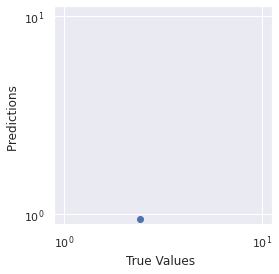

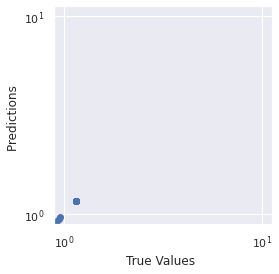

ScaledLASSO: -1.031328 (1.879368)
pred =  -0.2480581442053749 Y =  [1.15539397]
denormalized pred =  91.05526138092777 denormalized Y =  [91.18048587]

pred =  -0.2371416999078685 Y =  [-0.44932335]
denormalized pred =  91.05623541217285 denormalized Y =  [91.03730328]

pred =  -0.2480581442053736 Y =  [1.15539397]
denormalized pred =  91.05526138092777 denormalized Y =  [91.18048587]

pred =  -0.24805814420537442 Y =  [1.15539397]
denormalized pred =  91.05526138092777 denormalized Y =  [91.18048587]

pred =  -0.24805814420537495 Y =  [1.15539397]
denormalized pred =  91.05526138092777 denormalized Y =  [91.18048587]

pred =  -0.22679401153174458 Y =  [-1.97043354]
denormalized pred =  91.05715869557154 denormalized Y =  [90.90158062]

pred =  -0.22733388713607117 Y =  [-1.89107182]
denormalized pred =  91.05711052460188 denormalized Y =  [90.90866175]

pred =  -0.24235340582370676 Y =  [0.31679742]
denormalized pred =  91.05577039222095 denormalized Y =  [91.10566121]

pred =  -0.229

denormalized pred =  91.05542398603437 denormalized Y =  [91.15658292]

pred =  -0.2407100379442452 Y =  [0.07522234]
denormalized pred =  91.05591702345161 denormalized Y =  [91.08410642]

pred =  -0.24671689927314772 Y =  [0.95823096]
denormalized pred =  91.05538105492012 denormalized Y =  [91.1628938]

pred =  -0.22193502663060033 Y =  [-2.68470432]
denormalized pred =  91.05759224361925 denormalized Y =  [90.83784906]

pred =  -0.21609463603222429 Y =  [-3.54324174]
denormalized pred =  91.0581133586244 denormalized Y =  [90.76124515]

pred =  -0.2431987296006898 Y =  [0.44106002]
denormalized pred =  91.05569496731623 denormalized Y =  [91.11674868]

pred =  -0.24213584480796504 Y =  [0.28481595]
denormalized pred =  91.05578980433182 denormalized Y =  [91.10280763]

pred =  -0.2423242906068594 Y =  [0.31251749]
denormalized pred =  91.05577299005685 denormalized Y =  [91.10527933]

pred =  -0.24413709846413686 Y =  [0.57900024]
denormalized pred =  91.05561124036564 denormalized

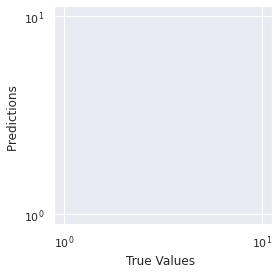

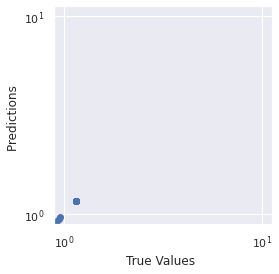

ScaledLASSO: -1.029659 (1.722303)
pred =  [0.19715555] Y =  [1.15539397]
denormalized pred =  [91.09498604] denormalized Y =  [91.18048587]

pred =  [-0.32238372] Y =  [-0.44932335]
denormalized pred =  [91.0486296] denormalized Y =  [91.03730328]

pred =  [0.19855651] Y =  [1.15539397]
denormalized pred =  [91.09511104] denormalized Y =  [91.18048587]

pred =  [0.31738235] Y =  [1.15539397]
denormalized pred =  [91.1057134] denormalized Y =  [91.18048587]

pred =  [-0.07825937] Y =  [1.15539397]
denormalized pred =  [91.07041186] denormalized Y =  [91.18048587]

pred =  [-0.30174983] Y =  [-1.97043354]
denormalized pred =  [91.05047068] denormalized Y =  [90.90158062]

pred =  [-0.55626959] Y =  [-1.89107182]
denormalized pred =  [91.02776089] denormalized Y =  [90.90866175]

pred =  [0.09822581] Y =  [0.31679742]
denormalized pred =  [91.08615893] denormalized Y =  [91.10566121]

pred =  [-0.05983725] Y =  [-1.60029224]
denormalized pred =  [91.07205559] denormalized Y =  [90.9346068

pred =  [-0.19725327] Y =  [0.80695039]
denormalized pred =  [91.0597945] denormalized Y =  [91.14939563]

pred =  [-0.58810871] Y =  [-0.46383112]
denormalized pred =  [91.02492001] denormalized Y =  [91.03600881]

pred =  [-0.54166446] Y =  [-0.00197502]
denormalized pred =  [91.02906405] denormalized Y =  [91.07721841]

pred =  [-0.46127162] Y =  [-1.73778256]
denormalized pred =  [91.03623718] denormalized Y =  [90.92233915]

pred =  [-0.17329714] Y =  [-0.00903345]
denormalized pred =  [91.06193201] denormalized Y =  [91.07658861]

pred =  [-0.32899725] Y =  [0.69777817]
denormalized pred =  [91.0480395] denormalized Y =  [91.13965462]

pred =  [-0.49529219] Y =  [-0.03768541]
denormalized pred =  [91.03320166] denormalized Y =  [91.07403211]

pred =  [-0.52494486] Y =  [0.19855742]
denormalized pred =  [91.03055587] denormalized Y =  [91.09511113]

pred =  [-0.32104104] Y =  [0.45261619]
denormalized pred =  [91.04874941] denormalized Y =  [91.11777979]

pred =  [-0.29117913] Y =

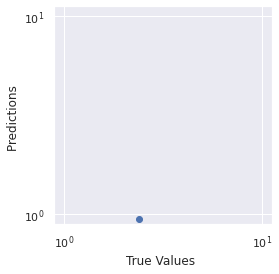

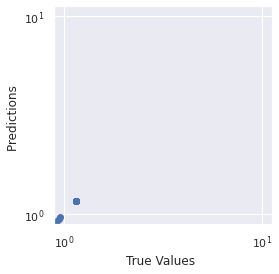

ScaledEN: -1.031328 (1.879368)
pred =  -0.2480581442053749 Y =  [1.15539397]
denormalized pred =  91.05526138092777 denormalized Y =  [91.18048587]

pred =  -0.2371416999078685 Y =  [-0.44932335]
denormalized pred =  91.05623541217285 denormalized Y =  [91.03730328]

pred =  -0.2480581442053736 Y =  [1.15539397]
denormalized pred =  91.05526138092777 denormalized Y =  [91.18048587]

pred =  -0.24805814420537442 Y =  [1.15539397]
denormalized pred =  91.05526138092777 denormalized Y =  [91.18048587]

pred =  -0.24805814420537495 Y =  [1.15539397]
denormalized pred =  91.05526138092777 denormalized Y =  [91.18048587]

pred =  -0.22679401153174458 Y =  [-1.97043354]
denormalized pred =  91.05715869557154 denormalized Y =  [90.90158062]

pred =  -0.22733388713607117 Y =  [-1.89107182]
denormalized pred =  91.05711052460188 denormalized Y =  [90.90866175]

pred =  -0.24235340582370676 Y =  [0.31679742]
denormalized pred =  91.05577039222095 denormalized Y =  [91.10566121]

pred =  -0.229311

pred =  -0.24293009165621693 Y =  [0.40157024]
denormalized pred =  91.05571893681989 denormalized Y =  [91.11322516]

pred =  -0.24372181711614513 Y =  [0.51795388]
denormalized pred =  91.05564829428148 denormalized Y =  [91.12360961]

pred =  -0.2382416567504795 Y =  [-0.28762969]
denormalized pred =  91.05613726736455 denormalized Y =  [91.05173057]

pred =  -0.2396319902775065 Y =  [-0.08325066]
denormalized pred =  91.05601321339061 denormalized Y =  [91.0699665]

pred =  -0.23715288469029833 Y =  [-0.44767918]
denormalized pred =  91.05623441419885 denormalized Y =  [91.03744998]

pred =  -0.2339140869945699 Y =  [-0.92378244]
denormalized pred =  91.05652339933597 denormalized Y =  [90.99496917]

pred =  -0.24568777978012762 Y =  [0.80695039]
denormalized pred =  91.05547287919127 denormalized Y =  [91.14939563]

pred =  -0.23704300755460844 Y =  [-0.46383112]
denormalized pred =  91.05624421810207 denormalized Y =  [91.03600881]

pred =  -0.24018488581428607 Y =  [-0.00197502]

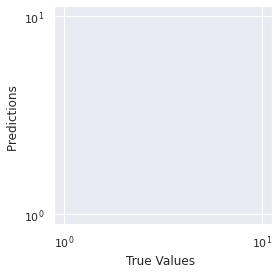

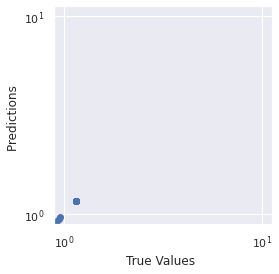

ScaledKNN: -1.171783 (1.733482)
pred =  [-0.53332989] Y =  [1.15539397]
denormalized pred =  [91.02980771] denormalized Y =  [91.18048587]

pred =  [-0.5814477] Y =  [-0.44932335]
denormalized pred =  [91.02551435] denormalized Y =  [91.03730328]

pred =  [-0.23875169] Y =  [1.15539397]
denormalized pred =  [91.05609176] denormalized Y =  [91.18048587]

pred =  [0.13534109] Y =  [1.15539397]
denormalized pred =  [91.08947058] denormalized Y =  [91.18048587]

pred =  [-0.24609368] Y =  [1.15539397]
denormalized pred =  [91.05543666] denormalized Y =  [91.18048587]

pred =  [-0.29351852] Y =  [-1.97043354]
denormalized pred =  [91.05120513] denormalized Y =  [90.90158062]

pred =  [-0.20727827] Y =  [-1.89107182]
denormalized pred =  [91.05890001] denormalized Y =  [90.90866175]

pred =  [-0.09133938] Y =  [0.31679742]
denormalized pred =  [91.06924478] denormalized Y =  [91.10566121]

pred =  [0.0032483] Y =  [-1.60029224]
denormalized pred =  [91.07768446] denormalized Y =  [90.9346068

pred =  [-0.75818745] Y =  [0.287609]
denormalized pred =  [91.00974456] denormalized Y =  [91.10305685]

pred =  [0.52953611] Y =  [-0.68323849]
denormalized pred =  [91.12464305] denormalized Y =  [91.01643196]

pred =  [0.2014213] Y =  [0.09879757]
denormalized pred =  [91.09536666] denormalized Y =  [91.08620995]

pred =  [0.37785485] Y =  [0.33428012]
denormalized pred =  [91.11110913] denormalized Y =  [91.10722113]

pred =  [-0.01642148] Y =  [-0.78581226]
denormalized pred =  [91.07592941] denormalized Y =  [91.0072797]

pred =  [-0.28649772] Y =  [0.24168969]
denormalized pred =  [91.05183157] denormalized Y =  [91.09895965]

pred =  [-0.56457738] Y =  [-1.06653084]
denormalized pred =  [91.02701962] denormalized Y =  [90.98223229]

pred =  [-0.18301615] Y =  [0.79187272]
denormalized pred =  [91.06106482] denormalized Y =  [91.14805031]

pred =  [0.29624608] Y =  [-1.65402722]
denormalized pred =  [91.1038275] denormalized Y =  [90.92981231]

pred =  [-1.04083686] Y =  [0.229

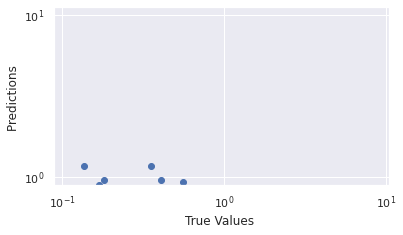

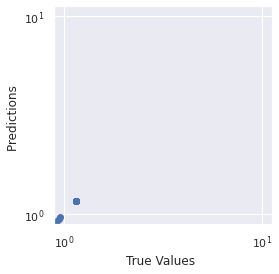

ScaledCART: -2.190109 (3.077047)
pred =  -1.4892162102250968 Y =  [1.15539397]
denormalized pred =  90.94451774468168 denormalized Y =  [91.18048587]

pred =  -0.5294380708703934 Y =  [-0.44932335]
denormalized pred =  91.03015496048168 denormalized Y =  [91.03730328]

pred =  1.1553939652336203 Y =  [1.15539397]
denormalized pred =  91.18048587420684 denormalized Y =  [91.18048587]

pred =  -0.26809641908288434 Y =  [1.15539397]
denormalized pred =  91.05347344473755 denormalized Y =  [91.18048587]

pred =  -0.6199431435452258 Y =  [1.15539397]
denormalized pred =  91.02207955000728 denormalized Y =  [91.18048587]

pred =  -0.9175058759912637 Y =  [-1.97043354]
denormalized pred =  90.99552920166359 denormalized Y =  [90.90158062]

pred =  -0.26722674086655385 Y =  [-1.89107182]
denormalized pred =  91.05355104269277 denormalized Y =  [90.90866175]

pred =  0.8656819186907263 Y =  [0.31679742]
denormalized pred =  91.1546360115851 denormalized Y =  [91.10566121]

pred =  -0.1125664318

denormalized pred =  91.13054647447235 denormalized Y =  [90.89959015]

pred =  0.679181787683555 Y =  [-1.15437845]
denormalized pred =  91.13799534088122 denormalized Y =  [90.974394]

pred =  0.8264779000672766 Y =  [0.37600613]
denormalized pred =  91.15113799171424 denormalized Y =  [91.11094417]

pred =  0.5775894874019423 Y =  [-0.75608328]
denormalized pred =  91.12893066084101 denormalized Y =  [91.0099323]

pred =  -1.2408383578556443 Y =  [-2.55199256]
denormalized pred =  90.96667952027452 denormalized Y =  [90.84969041]

pred =  -0.07130270139065444 Y =  [0.58489152]
denormalized pred =  91.07103257155974 denormalized Y =  [91.12958219]

pred =  -1.8910718239540296 Y =  [-0.3573353]
denormalized pred =  90.90866175411234 denormalized Y =  [91.04551101]

pred =  0.050317792325869075 Y =  [0.07865682]
denormalized pred =  91.08188428826283 denormalized Y =  [91.08441287]

pred =  -2.5519925554152887 Y =  [-0.18682065]
denormalized pred =  90.84969040543702 denormalized Y =  

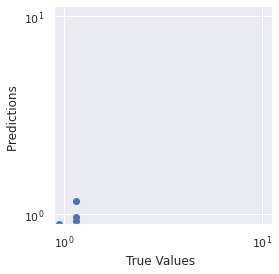

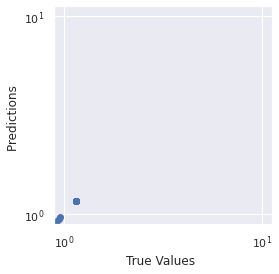

ScaledGBM: -1.282965 (1.933227)
pred =  0.4103662155597763 Y =  [1.15539397]
denormalized pred =  91.1140099882081 denormalized Y =  [91.18048587]

pred =  -0.2788282796968484 Y =  [-0.44932335]
denormalized pred =  91.05251588316612 denormalized Y =  [91.03730328]

pred =  0.5467066076853028 Y =  [1.15539397]
denormalized pred =  91.12617510335707 denormalized Y =  [91.18048587]

pred =  -0.026279970611273948 Y =  [1.15539397]
denormalized pred =  91.07504977215387 denormalized Y =  [91.18048587]

pred =  -0.03470393042251756 Y =  [1.15539397]
denormalized pred =  91.07429813546341 denormalized Y =  [91.18048587]

pred =  -0.8760695582483374 Y =  [-1.97043354]
denormalized pred =  90.99922640077556 denormalized Y =  [90.90158062]

pred =  -0.28749004932875816 Y =  [-1.89107182]
denormalized pred =  91.05174302764382 denormalized Y =  [90.90866175]

pred =  0.09568251656718291 Y =  [0.31679742]
denormalized pred =  91.08593200358398 denormalized Y =  [91.10566121]

pred =  0.0904635538

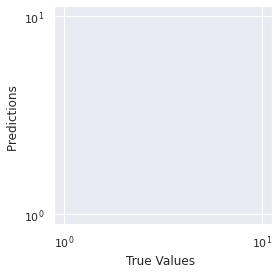

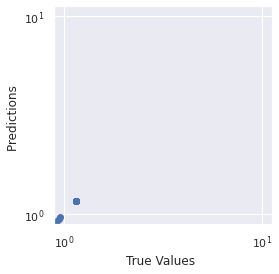

ScaledGBM: -1.099981 (1.764673)
pred =  0.20639629930611694 Y =  [1.15539397]
denormalized pred =  91.09581055750772 denormalized Y =  [91.18048587]

pred =  -0.3673411247283034 Y =  [-0.44932335]
denormalized pred =  91.04461823130241 denormalized Y =  [91.03730328]

pred =  0.4235377102713401 Y =  [1.15539397]
denormalized pred =  91.11518522870252 denormalized Y =  [91.18048587]

pred =  -0.06268211055085539 Y =  [1.15539397]
denormalized pred =  91.0718017528609 denormalized Y =  [91.18048587]

pred =  -0.04320630126406285 Y =  [1.15539397]
denormalized pred =  91.07353950246615 denormalized Y =  [91.18048587]

pred =  -0.6071316627872392 Y =  [-1.97043354]
denormalized pred =  91.02322266787733 denormalized Y =  [90.90158062]

pred =  -0.25945984944606787 Y =  [-1.89107182]
denormalized pred =  91.05424405176372 denormalized Y =  [90.90866175]

pred =  0.1785732195845171 Y =  [0.31679742]
denormalized pred =  91.09332801390245 denormalized Y =  [91.10566121]

pred =  0.10938984657

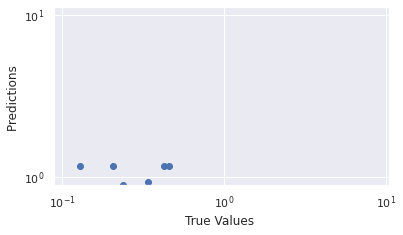

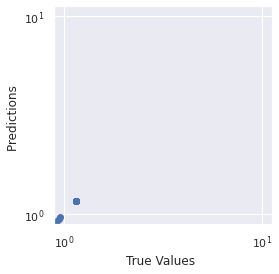

In [375]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[0:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products",
                             "Confirmed_finish", "Recovered", "Deaths_percent"])

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)



X = frame_food[columns[0:]]
Y = X[name_y].values

ind = Y > 90 
Y = Y[ind]
X = X[ind]


a = 0
b = 100
print(columns)
d = Y
min_d = np.min(d)
max_d = np.max(d)
normalized_d = (b - a) * ((d - min_d) / (max_d - min_d)) + a

def denormalized(x):
    return (x / (b - a)) * (max_d - min_d) + min_d 



X = X.drop(name_y, axis = 1).values



Y = normalized_d

print("a, b, min_d, max_d", a, b, min_d, max_d)
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)


X = transformer.transform(X)

transformerY = RobustScaler().fit(Y.reshape(-1, 1))


Y = transformerY.transform(Y.reshape(-1, 1))



pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    try:
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    except Exception as e:
        try :
            print("excemt",e, len(X))
            kfold = KFold(n_splits=int(len(X)/2), random_state=21)
            cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e2:
            print("excemt",e2, len(X))
            model.fit(X_train, Y_train)
            class tmp(): 
                content = {}
            cv_results = tmp()
            cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
            cv_results.std = lambda : -1


    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    pred = []
    for ind in range(len(X)):
        dataX = np.delete(X, ind, axis=0)
        dataY = np.delete(Y, ind, axis=0)
        try:
            model.fit(dataX, dataY)
            pred.append(model.predict(X[ind].reshape(1, -1))[0])
        except:
            pred = [-1 for i in Y]
    for ind in range(len(pred)):
        print("pred = ", pred[ind], "Y = ", Y[ind])
        print("denormalized pred = ", denormalized(pred[ind]), "denormalized Y = ", denormalized(Y[ind]))
        print()

    g=plt.scatter(pred, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)

    g=plt.scatter(Y, Y)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)






In [356]:
Y, transformerY.inverse_transform(Y), denormalized(transformerY.inverse_transform(Y))

(array([[ 1.15539397e+00],
        [-4.49323346e-01],
        [ 1.15539397e+00],
        [ 1.15539397e+00],
        [ 1.15539397e+00],
        [-1.97043354e+00],
        [-1.89107182e+00],
        [ 3.16797423e-01],
        [-1.60029224e+00],
        [-2.28943647e+00],
        [-2.67226741e-01],
        [ 1.15539397e+00],
        [-1.24300825e+00],
        [ 2.83929471e-01],
        [-9.17505876e-01],
        [-1.93496315e+00],
        [-5.94157111e-01],
        [ 1.15539397e+00],
        [ 1.68477077e-01],
        [-4.22994180e-01],
        [ 1.15539397e+00],
        [ 1.79738065e-01],
        [-4.41335190e-02],
        [ 4.82065689e-01],
        [ 6.79181788e-01],
        [-1.38122292e+00],
        [ 6.64168218e-01],
        [ 1.60385105e-01],
        [-4.86914694e-01],
        [ 3.66606001e-01],
        [ 2.02194205e-01],
        [ 1.15539397e+00],
        [ 8.26477900e-01],
        [-3.75686968e-01],
        [ 8.65681919e-01],
        [ 1.06803697e-01],
        [-7.71866925e-01],
 

ind = Y > 90 

np.mean(Y[ind]), np.median(Y[ind])
np.mean(normalized_d2(0,100,Y[ind])[0]), np.median(normalized_d2(0,100,Y[ind])[0])

In [357]:
import tensorflow as tf
from tensorflow.keras.models import Model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=2),
    tf.keras.layers.Dense(units=1)
])
model.build(X.shape)
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    metrics='mean_squared_error',
    loss='mean_squared_error')
model.summary()



Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (148, 20)                 200       
_________________________________________________________________
dense_120 (Dense)            (148, 10)                 210       
_________________________________________________________________
dense_121 (Dense)            (148, 2)                  22        
_________________________________________________________________
dense_122 (Dense)            (148, 1)                  3         
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [358]:
model.optimizer.lr.assign(0.01)

ty, a2, b2, min_d2, max_d2 = normalized_d2(0, 1, Y)


for i in range(100):
    model.fit(X, Y)
    #model.fit(X, ty)    

5/5 [==============================] - 0s 3ms/step - loss: 0.9074 - mean_squared_error: 0.9074


In [359]:
from sklearn.metrics import mean_squared_error
mean_squared_error(transformerY.inverse_transform(model.predict(X)), transformerY.inverse_transform(Y))


403.38581340562445

In [360]:
list(zip(transformerY.inverse_transform(model.predict(X)), transformerY.inverse_transform(Y)))

[(array([79.89579], dtype=float32), array([100.])),
 (array([68.866234], dtype=float32), array([66.15512433])),
 (array([80.76344], dtype=float32), array([100.])),
 (array([79.63688], dtype=float32), array([100.])),
 (array([74.29138], dtype=float32), array([100.])),
 (array([65.53529], dtype=float32), array([34.07359513])),
 (array([55.03588], dtype=float32), array([35.7474023])),
 (array([77.52923], dtype=float32), array([82.31327381])),
 (array([72.90695], dtype=float32), array([41.88019507])),
 (array([58.451855], dtype=float32), array([27.34554739])),
 (array([60.596775], dtype=float32), array([69.9956992])),
 (array([65.00141], dtype=float32), array([100.])),
 (array([63.563637], dtype=float32), array([49.41562341])),
 (array([82.66067], dtype=float32), array([81.62006027])),
 (array([67.36434], dtype=float32), array([56.28074996])),
 (array([67.032234], dtype=float32), array([34.82169618])),
 (array([70.19596], dtype=float32), array([63.10045501])),
 (array([83.44022], dtype=flo

In [361]:
def denormalized2(a2, b2, min_d2, max_d2,X):
    return transformerY.inverse_transform(X)

In [362]:
list(zip(denormalized(denormalized2(a2, b2, min_d2, max_d2, model.predict(X))), denormalized(Y)))

[(array([98.20618], dtype=float32), array([91.18048587])),
 (array([97.22205], dtype=float32), array([91.03730328])),
 (array([98.2836], dtype=float32), array([91.18048587])),
 (array([98.183075], dtype=float32), array([91.18048587])),
 (array([97.706116], dtype=float32), array([91.18048587])),
 (array([96.92485], dtype=float32), array([90.90158062])),
 (array([95.98803], dtype=float32), array([90.90866175])),
 (array([97.99502], dtype=float32), array([91.10566121])),
 (array([97.582596], dtype=float32), array([90.93460687])),
 (array([96.29282], dtype=float32), array([90.87311725])),
 (array([96.48421], dtype=float32), array([91.05355104])),
 (array([96.87721], dtype=float32), array([91.18048587])),
 (array([96.748924], dtype=float32), array([90.96648591])),
 (array([98.45288], dtype=float32), array([91.10272854])),
 (array([97.08804], dtype=float32), array([90.9955292])),
 (array([97.05841], dtype=float32), array([90.9047455])),
 (array([97.3407], dtype=float32), array([91.02438034])

(0, 100, 0.9017102515657447, 100.0)

In [ ]:
# Preprocess 
# Verifier dataFrame 1 a 1 Choix un seul
# Animal product, Vegetal product c'est resumé des autres colonnes. Multipliée par 2
# 

#1°) Faire matrice correlation meilleur recovered
#2°) Faire meilleur regression avec tout 
#3°) Remarquer que c'est etrange 
#4°) Faire meilleur regression sur differents group

#J'ai fais leaveoneout j'ai fais un par un et c'est la merde

In [482]:
#Confirmed,  Deaths,   Recovered,  Active
1.258752 == 0.011381 + 1.048725 + 0.198645
# Recovered,                   Deaths,                      Active
(1.048725*100) / 1.258752 + (0.011381*100) / 1.258752  + (0.198645*100) / 1.258752 


99.99992055623345

In [39]:
for i in range(0, len(frame_food)):
    print(sum(frame_food.drop(columns=["Obesity", "Vegetal Products", "Animal Products"]).iloc[i]))

KeyError: "['Obesity' 'Vegetal Products' 'Animal Products'] not found in axis"

In [40]:
len(frame.groupby("Country").mean())

159

# Kmeans

In [110]:

kmeans = KMeans(n_clusters=10, random_state=0).fit(frame_food.to_numpy())
kmeans.labels_
c = kmeans.cluster_centers_



In [111]:
def entity_distance(ent1, ent2):
    return np.linalg.norm(ent1-ent2)


distances = np.ones((len(c), len(c)), dtype=np.float)
print(distances.shape)
for i in range(len(c)):
    for j in range(len(c)):
        if i < j:
            continue
        distances[i, j] = entity_distance(c[i], c[j])

for i in range(len(c)):
    for j in range(len(c)):
        if i < j:
            distances[i, j] = distances[j, i]
pd.DataFrame(distances)

(10, 10)


0          1          2          3          4          5          6          7          8          9
0   0.000000  44.238555  19.861582  29.424819  18.154422  30.120263  18.944236  39.174666  24.314245  38.093835
1  44.238555   0.000000  28.062249  29.636578  37.936867  26.437233  44.653589  19.409262  27.797397  20.251237
2  19.861582  28.062249   0.000000  27.331407  21.007886  19.548121  26.881668  30.728201  17.350907  19.177678
3  29.424819  29.636578  27.331407   0.000000  30.822088  31.090277  29.718638  19.760340  27.507494  37.886099
4  18.154422  37.936867  21.007886  30.822088   0.000000  21.597916  23.628906  30.784841  11.606689  31.681645
5  30.120263  26.437233  19.548121  31.090277  21.597916   0.000000  28.427201  26.608033  12.321560  21.522967
6  18.944236  44.653589  26.881668  29.718638  23.628906  28.427201   0.000000  38.251456  25.832895  41.755433
7  39.174666  19.409262  30.728201  19.760340  30.784841  26.608033  38.251456   0.000000  23.497924  31.281237
8  24.314245  27.797397  17.350907  27.507494  11.606689  12.321560  25.832895  23.497924   0.000000  23.299179
9  38.093835  20.251237  19.177678  37.886099  31.681645  21.522967  41.755433  31.281237  23.299179   0.000000

In [24]:
ass = kmeans.labels_
data = frame.to_numpy()

In [25]:
data.T[:,0].shape, data[0].shape

((189,), (189,))

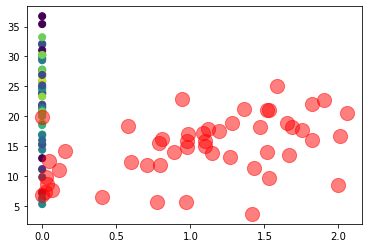

In [26]:
plt.scatter(frame.to_numpy()[:, 0][0:50], frame.to_numpy()[:, 1][0:50], c=ass[0:50], s=50, cmap='viridis')



centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);



(1, 10)
(1, 4)
(1, 4)


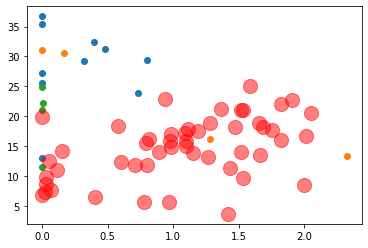

In [27]:
for k in range(3):
    print(data.T[0,np.where(ass==k)][:,0:10].shape)
    plt.scatter(data.T[0,np.where(ass==k)][:,0:10],data.T[1,np.where(ass==k)][:,0:10])
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


In [30]:
len(frame.columns)

189

In [ ]:
for i in range(len(frame.columns)):
    for j in range(len(frame.columns)):
        for k in range(3):
            print(data.T[0,np.where(ass==k)][:,0:10].shape)
            plt.scatter(data.T[i,np.where(ass==k)][:,0:10],data.T[j,np.where(ass==k)][:,0:10])
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
        plt.show()


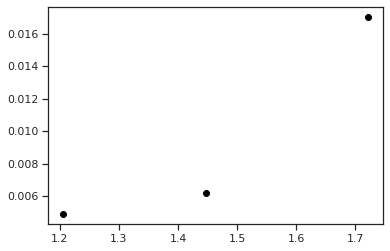

In [51]:
#for k in range(3):
#    plt.scatter(data.T[0,np.where(ass==k)],data.T[1,np.where(ass==k)])
#plt.scatter(init_v[:,0],init_v[:,1],color='lightblue')
plt.scatter(c[:,2],c[:,3],color='black')


0 3


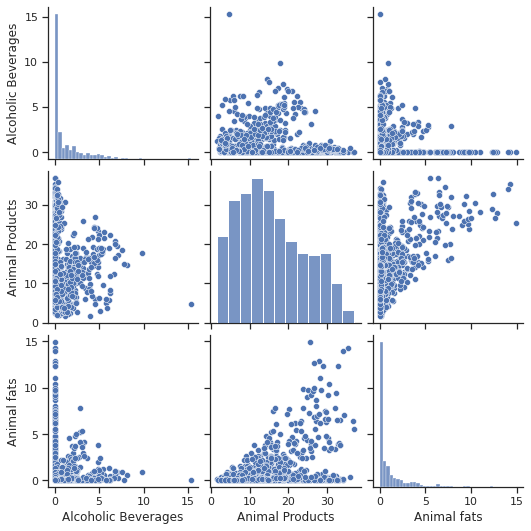

3 6


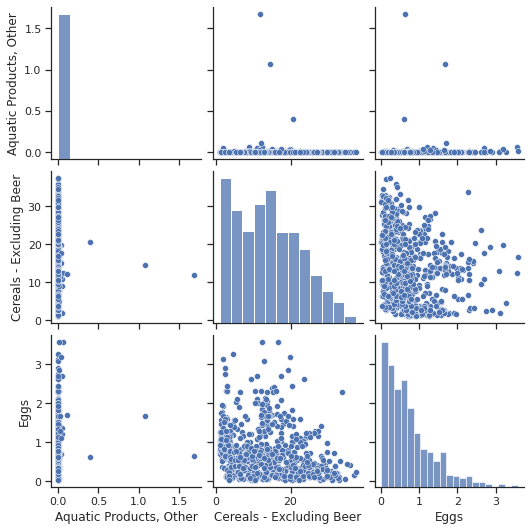

6 9


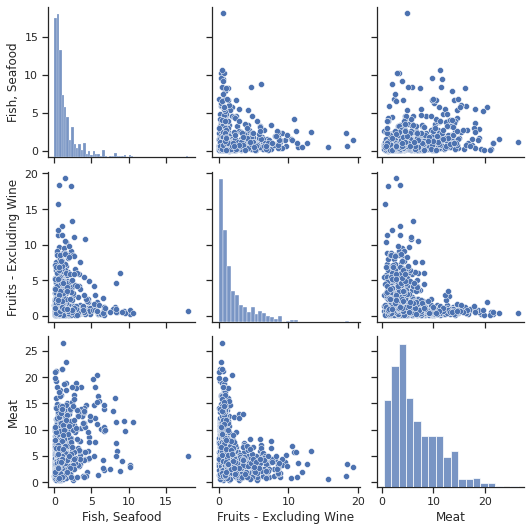

9 12


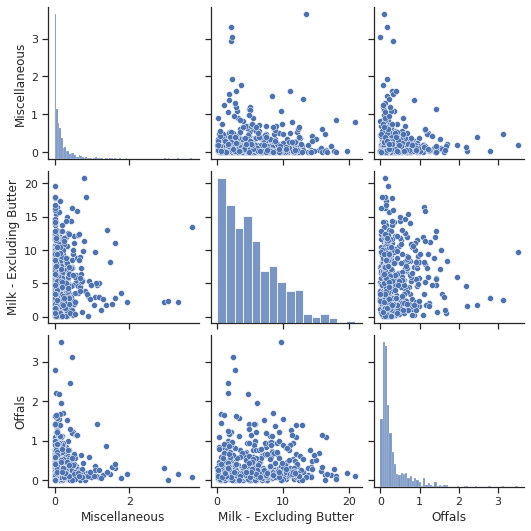

12 15


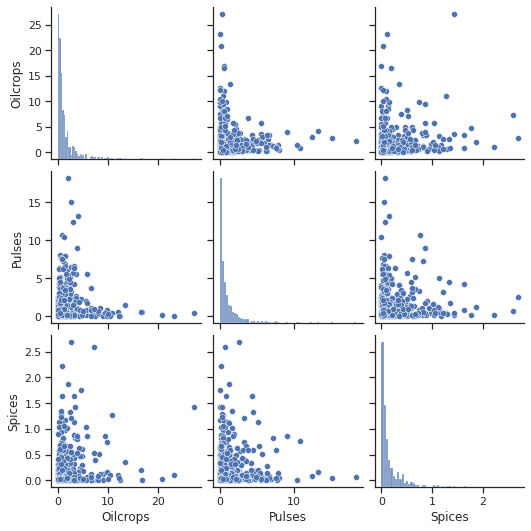

15 18


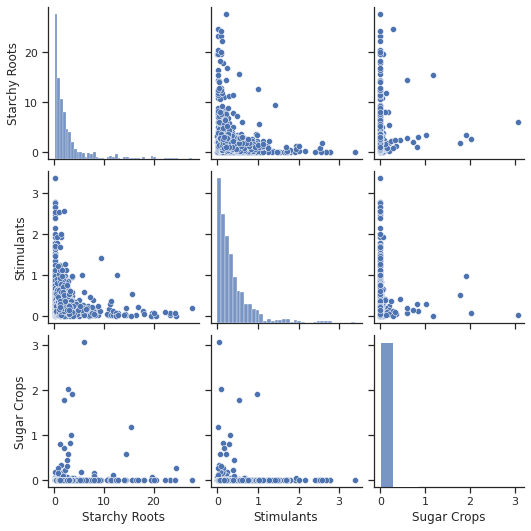

18 21


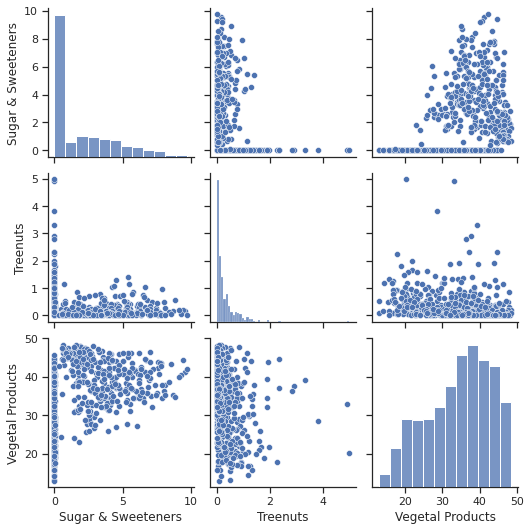

21 24


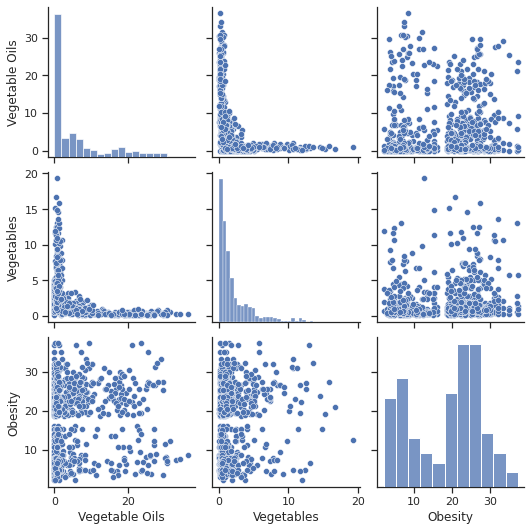

24 27


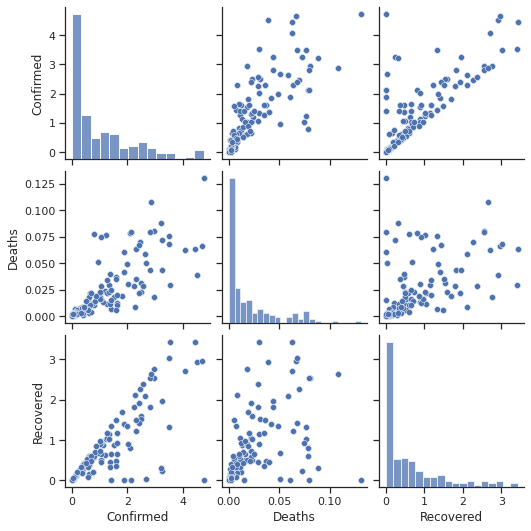

In [23]:

sns.set_theme(style="ticks")
prec = 0
for i in range(3,29,3):
    print(prec, i)
    sns.pairplot(frame[frame.columns[prec:i]])
    prec = i
    plt.show()


In [76]:
frame.to_numpy()[:,0]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamai

In [71]:
kmeans.cluster_centers_.shape

(3, 188)

# Brouillon

In [31]:
fus = []
for i in range(0, 3):
    fus += list(grouped_index.pop(0))
grouped_index[0] = fus + list(grouped_index[0])
len(grouped_index)

7

<ipython-input-11-2999e622fbaf>:53: RuntimeWarning: Mean of empty slice.
  ax.text3D(X[y == label, 3].mean(),
/home/brami/env2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-11-2999e622fbaf>:54: RuntimeWarning: Mean of empty slice.
  X[y == label, 0].mean(),
<ipython-input-11-2999e622fbaf>:55: RuntimeWarning: Mean of empty slice.
  X[y == label, 2].mean() + 2, name,


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

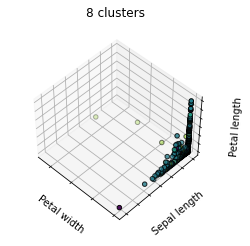

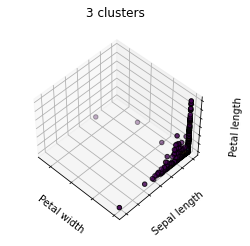

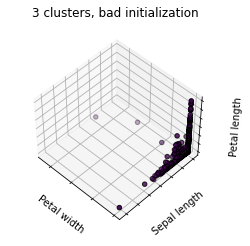

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


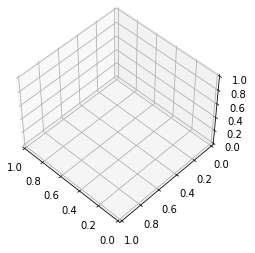

In [11]:


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = frame.drop(columns=[name_y]).to_numpy()
y = frame[name_y].to_numpy()

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()


In [49]:
len(frame.head())
frame.head()

Country  Alcoholic Beverages  Animal Products  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine     Meat  Miscellaneous  Milk - Excluding Butter  Offals  Oilcrops  Pulses  Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetal Products  Vegetable Oils  Vegetables  Obesity  Confirmed    Deaths  Recovered    Active  Population  Confirmed_finish  Recovered_percent  Deaths_percent
0          Afghanistan                  0.0          21.6397       6.2224                      0.0                    8.0353  0.6859         0.0327                   0.4246   6.1244         0.0163                   8.2803  0.3103    1.0452  0.1960  0.2776         0.0490      0.0980          0.0                 0.0    0.7513           28.3684         17.0831      0.3593      4.5   0.112646  0.004226   0.090667  0.017753  38928000.0          0.094893          95.546833        4.453167
1              Albania                  0.0          32.0002       3.4172                      0.0                    2.6734  1.6448         0.1445                   0.6418   8.7428         0.0170                  17.7576  0.2933    3.1622  0.1148  0.0000         0.0510      0.5270          0.0                 0.0    0.9181           17.9998          9.2443      0.6503     22.3   1.051339  0.022763   0.500916  0.527660   2838000.0          0.523679          95.653344        4.346656
2              Algeria                  0.0          14.4175       0.8972                      0.0                    4.2035  1.2171         0.2008                   0.5772   3.8961         0.0439                   8.0934  0.1067    1.1983  0.2698  0.1568         0.1129      0.2886          0.0                 0.0    0.8595           35.5857         27.3606      0.5145     26.6   0.159229  0.004973   0.104439  0.049816  44357000.0          0.109412          95.454545        4.545455
3               Angola                  0.0          15.3041       1.3130                      0.0                    6.5545  0.1539         1.4155                   0.3488  11.0268         0.0308                   1.2309  0.1539    3.9902  0.3282  0.0103         0.7078      0.1128          0.0                 0.0    0.0308           34.7010         22.4638      0.1231      6.8   0.042808  0.001021   0.020365  0.021422  32522000.0          0.021386          95.226456        4.773544
4  Antigua and Barbuda                  0.0          27.7033       4.6686                      0.0                    3.2153  0.3872         1.5263                   1.2177  14.3202         0.0898                   6.6607  0.1347    1.3579  0.0673  0.3591         0.0449      1.0549          0.0                 0.0    0.2020           22.2995         14.4436      0.2469     19.1   0.141837  0.004082   0.129592  0.008163     98000.0          0.133673          96.946565        3.053435

In [103]:
 np.concatenate(grouped_index[1:])

array([ 70, 133, 119,  84,  43,  56,  65,   1,  39,  15,  17,  13, 140,
        42,  71, 126,  72,  90, 157, 135,  67,  77, 158,  21,  66,  87,
        97, 137,  23,  10, 145, 125, 122,  74, 159,  35,  95, 123,  18,
       114,  55,  31,  33,   8, 116, 124, 108, 138,  20, 120,  83,   5,
       141, 146,  51, 161, 118,  73,   6,  38,  91, 102,  14])

# Def

In [159]:
correlation

Alcoholic Beverages  Animal fats  Aquatic Products, Other  Cereals - Excluding Beer      Eggs  Fish, Seafood  Fruits - Excluding Wine      Meat  Miscellaneous  Milk - Excluding Butter    Offals  Oilcrops    Pulses    Spices  Starchy Roots  Stimulants  Sugar Crops  Sugar & Sweeteners  Treenuts  Vegetable Oils  Vegetables  Recovered_percent
Alcoholic Beverages                       NaN          NaN                      NaN                       NaN       NaN            NaN                      NaN       NaN            NaN                      NaN       NaN       NaN       NaN       NaN            NaN         NaN          NaN                 NaN       NaN             NaN         NaN                NaN
Animal fats                               NaN     1.000000                      NaN                 -0.378220 -0.089938       0.003870                -0.363740 -0.082426      -0.140480                -0.044367 -0.277982 -0.406564 -0.374311 -0.200682      -0.251897    0.033593    -0.065573           -0.044598 -0.046941       -0.296783   -0.193732          -0.120920
Aquatic Products, Other                   NaN          NaN                      NaN                       NaN       NaN            NaN                      NaN       NaN            NaN                      NaN       NaN       NaN       NaN       NaN            NaN         NaN          NaN                 NaN       NaN             NaN         NaN                NaN
Cereals - Excluding Beer                  NaN    -0.378220                      NaN                  1.000000  0.082883       0.119733                -0.048771 -0.172874       0.328943                -0.115992  0.274357  0.041029  0.323941  0.169584       0.212301    0.170738    -0.139696           -0.165771  0.066009        0.007886    0.116199           0.248331
Eggs                                      NaN    -0.089938                      NaN                  0.082883  1.000000       0.536935                 0.060966  0.050053       0.253371                 0.115329  0.184756 -0.116508 -0.081489  0.103901       0.285912    0.035210    -0.129288           -0.109798  0.189368       -0.303956    0.232434          -0.004956
Fish, Seafood                             NaN     0.003870                      NaN                  0.119733  0.536935       1.000000                 0.045674 -0.125516       0.670699                 0.044712 -0.119602  0.062912 -0.021421  0.298913      -0.002813    0.127120    -0.061233           -0.019350  0.502139       -0.374100    0.142248           0.035468
Fruits - Excluding Wine                   NaN    -0.363740                      NaN                 -0.048771  0.060966       0.045674                 1.000000 -0.106830       0.063286                -0.068130  0.266368  0.514790  0.246445  0.019849       0.215809   -0.112344    -0.057515           -0.019663 -0.017352        0.166766    0.015683           0.061588
Meat                                      NaN    -0.082426                      NaN                 -0.172874  0.050053      -0.125516                -0.106830  1.000000       0.017803                 0.113129  0.168417 -0.146007 -0.161333 -0.116947       0.113006    0.122285     0.155077           -0.023055 -0.286361       -0.486914   -0.106304          -0.100847
Miscellaneous                             NaN    -0.140480                      NaN                  0.328943  0.253371       0.670699                 0.063286  0.017803       1.000000                -0.013696 -0.057358  0.207322  0.123145  0.422761      -0.106954    0.251327    -0.082991           -0.100898  0.285555       -0.332861    0.150499           0.117578
Milk - Excluding Butter                   NaN    -0.044367                      NaN                 -0.115992  0.115329       0.044712                -0.068130  0.113129      -0.013696                 1.000000  0.179503 -0.101550 -0.195573  0.152118      -0.150640    0.374145    -0.067689           -0.046176  0.017465       -0.610540    0.474149         

<AxesSubplot:>

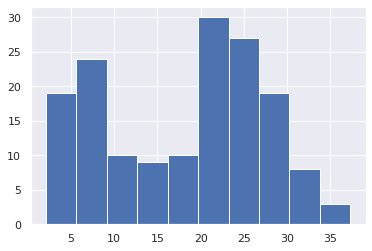

In [161]:
frame["Obesity"].hist()

[ 70 133 119  84  43  56  65   1  39  15  17  13 140  42  71 126  72  90
 157 135  67  77 158  21  66  87  97 137  23  10 145 125 122  74 159  35
  95 123  18 114  55  31  33   8 116 124 108 138  20 120  83   5 141 146
  51 161 118  73   6  38  91 102  14]
2.167578665958262
63
63
[ 1.          0.3420544   0.18399177  0.01555664  0.00587718 -0.00421565
 -0.01579439 -0.05502703 -0.0556044  -0.05586464]


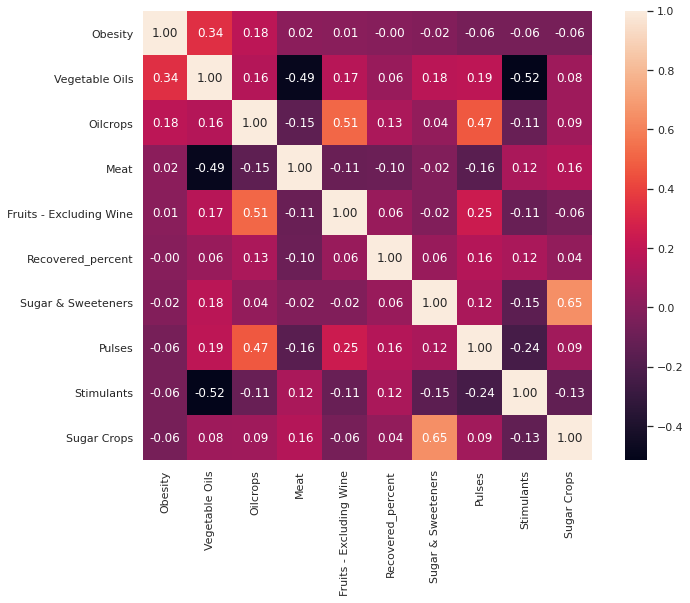

ScaledLR: -0.608258 (1.201829) 






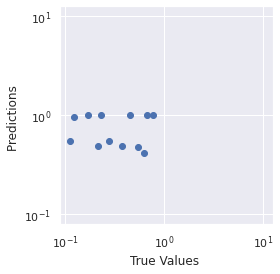

pred : 21.288753800818142 TrueY : 25.5
pred : 24.64531880257464 TrueY : 29.729994919597296
pred : 27.2183118610388 TrueY : 19.409687620085244
pred : 22.077760961738623 TrueY : 19.409687620085244
pred : 25.594455126792397 TrueY : 19.409687620085244
pred : 24.021689001579695 TrueY : 25.7
pred : 23.988605586518595 TrueY : 19.409687620085244
pred : 25.706601236045763 TrueY : 22.3
pred : 21.6665553822158 TrueY : 21.3
pred : 25.109114119604115 TrueY : 22.4
pred : 27.512957838269674 TrueY : 19.409687620085244
pred : 24.503126238631204 TrueY : 26.6
pred : 27.34327888391838 TrueY : 27.0
pred : 19.409687620085244 TrueY : 26.9
pred : 25.991081984150302 TrueY : 27.4
pred : 24.611598635955588 TrueY : 25.7
pred : 24.4385060372479 TrueY : 26.9
pred : 22.696084329198616 TrueY : 28.4
pred : 22.61231976435112 TrueY : 26.1
pred : 25.823064621747587 TrueY : 23.5
pred : 22.651475018703795 TrueY : 23.1
pred : 28.531364341505565 TrueY : 29.729994919597296
pred : 19.409687620085244 TrueY : 29.729994919597296


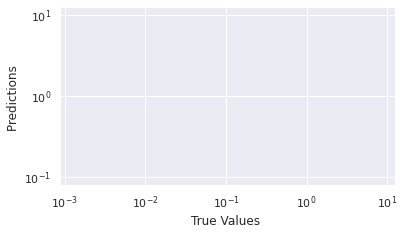

pred : 24.50205077318622 TrueY : 25.5
pred : 24.433825048676585 TrueY : 29.729994919597296
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.498824966734606 TrueY : 25.7
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.553663676412025 TrueY : 22.3
pred : 24.56979270867009 TrueY : 21.3
pred : 24.55205077318622 TrueY : 22.4
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.484308837702347 TrueY : 26.6
pred : 24.477857224799124 TrueY : 27.0
pred : 24.47947012802493 TrueY : 26.9
pred : 24.471405611895896 TrueY : 27.4
pred : 24.498824966734606 TrueY : 25.7
pred : 24.47947012802493 TrueY : 26.9
pred : 24.455276579637832 TrueY : 28.4
pred : 24.49237335383138 TrueY : 26.1
pred : 24.534308837702348 TrueY : 23.5
pred : 24.540760450605575 TrueY : 23.1
pred : 24.433825048676585 TrueY : 29.729994919597296
pred : 24.433825048676585 TrueY : 29.7299949195972

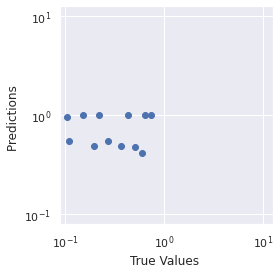

pred : 21.45945075804555 TrueY : 25.5
pred : 24.639265691787074 TrueY : 29.729994919597296
pred : 27.119507625805888 TrueY : 19.409687620085244
pred : 22.167883810438127 TrueY : 19.409687620085244
pred : 25.5769899000934 TrueY : 19.409687620085244
pred : 24.049201515381316 TrueY : 25.7
pred : 24.035270701307233 TrueY : 19.409687620085244
pred : 25.670986470741926 TrueY : 22.3
pred : 21.788002594993365 TrueY : 21.3
pred : 25.08555248960418 TrueY : 22.4
pred : 27.360930793786228 TrueY : 19.409687620085244
pred : 24.49599191623834 TrueY : 26.6
pred : 27.209397582979754 TrueY : 27.0
pred : 19.409687620085244 TrueY : 26.9
pred : 25.94557722841316 TrueY : 27.4
pred : 24.60998678620449 TrueY : 25.7
pred : 24.430325140995325 TrueY : 26.9
pred : 22.755329721635555 TrueY : 28.4
pred : 22.69559408467538 TrueY : 26.1
pred : 25.718094132261328 TrueY : 23.5
pred : 22.712806426023302 TrueY : 23.1
pred : 28.354640445589755 TrueY : 29.729994919597296
pred : 19.409687620085244 TrueY : 29.729994919597296

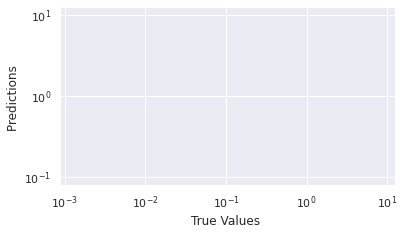

pred : 24.50205077318622 TrueY : 25.5
pred : 24.433825048676585 TrueY : 29.729994919597296
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.498824966734606 TrueY : 25.7
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.553663676412025 TrueY : 22.3
pred : 24.56979270867009 TrueY : 21.3
pred : 24.55205077318622 TrueY : 22.4
pred : 24.600281618023555 TrueY : 19.409687620085244
pred : 24.484308837702347 TrueY : 26.6
pred : 24.477857224799124 TrueY : 27.0
pred : 24.47947012802493 TrueY : 26.9
pred : 24.471405611895896 TrueY : 27.4
pred : 24.498824966734606 TrueY : 25.7
pred : 24.47947012802493 TrueY : 26.9
pred : 24.455276579637832 TrueY : 28.4
pred : 24.49237335383138 TrueY : 26.1
pred : 24.534308837702348 TrueY : 23.5
pred : 24.540760450605575 TrueY : 23.1
pred : 24.433825048676585 TrueY : 29.729994919597296
pred : 24.433825048676585 TrueY : 29.7299949195972

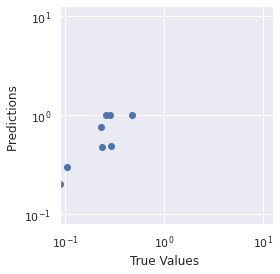

pred : 23.509874031953558 TrueY : 25.5
pred : 27.025998983919457 TrueY : 29.729994919597296
pred : 26.35199796783892 TrueY : 19.409687620085244
pred : 21.46193752401705 TrueY : 19.409687620085244
pred : 25.46599898391946 TrueY : 19.409687620085244
pred : 24.16 TrueY : 25.7
pred : 23.987936507936507 TrueY : 19.409687620085244
pred : 23.689874031953558 TrueY : 22.3
pred : 22.561937524017047 TrueY : 21.3
pred : 22.091811555970605 TrueY : 22.4
pred : 27.06599898391946 TrueY : 19.409687620085244
pred : 23.76 TrueY : 26.6
pred : 25.76599898391946 TrueY : 27.0
pred : 24.167936507936506 TrueY : 26.9
pred : 24.307936507936507 TrueY : 27.4
pred : 24.44 TrueY : 25.7
pred : 24.18 TrueY : 26.9
pred : 24.46 TrueY : 28.4
pred : 25.1 TrueY : 26.1
pred : 23.46193752401705 TrueY : 23.5
pred : 24.74599898391946 TrueY : 23.1
pred : 26.033935491855967 TrueY : 29.729994919597296
pred : 20.007750096068193 TrueY : 29.729994919597296
pred : 24.487936507936507 TrueY : 27.4
pred : 24.6 TrueY : 28.6
pred : 25.893

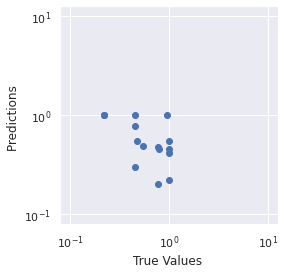

pred : 19.409687620085244 TrueY : 25.5
pred : 22.9 TrueY : 29.729994919597296
pred : 23.9 TrueY : 19.409687620085244
pred : 29.729994919597296 TrueY : 19.409687620085244
pred : 27.1 TrueY : 19.409687620085244
pred : 22.4 TrueY : 25.7
pred : 22.4 TrueY : 19.409687620085244
pred : 29.729994919597296 TrueY : 22.3
pred : 20.9 TrueY : 21.3
pred : 19.409687620085244 TrueY : 22.4
pred : 29.729994919597296 TrueY : 19.409687620085244
pred : 23.3 TrueY : 26.6
pred : 28.5 TrueY : 27.0
pred : 29.729994919597296 TrueY : 26.9
pred : 29.729994919597296 TrueY : 27.4
pred : 21.2 TrueY : 25.7
pred : 28.6 TrueY : 26.9
pred : 19.409687620085244 TrueY : 28.4
pred : 26.9 TrueY : 26.1
pred : 29.5 TrueY : 23.5
pred : 21.3 TrueY : 23.1
pred : 25.7 TrueY : 29.729994919597296
pred : 19.409687620085244 TrueY : 29.729994919597296
pred : 27.0 TrueY : 27.4
pred : 26.9 TrueY : 28.6
pred : 26.9 TrueY : 29.729994919597296
pred : 25.7 TrueY : 29.729994919597296
pred : 28.5 TrueY : 22.4
pred : 22.4 TrueY : 19.40968762008

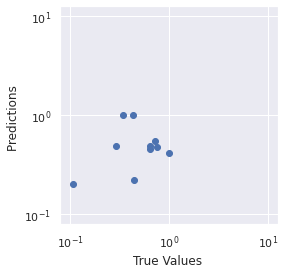

pred : 22.316740660888783 TrueY : 25.5
pred : 24.07409356645327 TrueY : 29.729994919597296
pred : 24.702303717300456 TrueY : 19.409687620085244
pred : 25.564758695025983 TrueY : 19.409687620085244
pred : 26.019800030448383 TrueY : 19.409687620085244
pred : 23.520622576434896 TrueY : 25.7
pred : 20.965233165795517 TrueY : 19.409687620085244
pred : 27.49777332129874 TrueY : 22.3
pred : 21.26859803490754 TrueY : 21.3
pred : 19.409687620085244 TrueY : 22.4
pred : 26.13679709622851 TrueY : 19.409687620085244
pred : 22.513461074258554 TrueY : 26.6
pred : 28.41053008629461 TrueY : 27.0
pred : 27.891723483657177 TrueY : 26.9
pred : 28.236591008911454 TrueY : 27.4
pred : 23.96785963956748 TrueY : 25.7
pred : 23.955719000816845 TrueY : 26.9
pred : 20.686900776490514 TrueY : 28.4
pred : 22.034002161762096 TrueY : 26.1
pred : 27.719989883809095 TrueY : 23.5
pred : 26.142228045034003 TrueY : 23.1
pred : 26.308848500628663 TrueY : 29.729994919597296
pred : 20.273133996183283 TrueY : 29.7299949195972

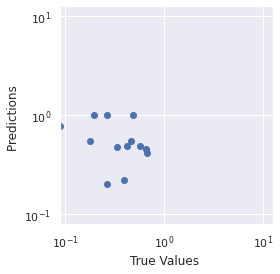

pred : 21.330712419639063 TrueY : 25.5
pred : 25.583374399958494 TrueY : 29.729994919597296
pred : 25.608841891866344 TrueY : 19.409687620085244
pred : 25.65357092053116 TrueY : 19.409687620085244
pred : 25.417889510913962 TrueY : 19.409687620085244
pred : 23.888290628602558 TrueY : 25.7
pred : 23.582896457391886 TrueY : 19.409687620085244
pred : 25.894147885444504 TrueY : 22.3
pred : 22.219149917605584 TrueY : 21.3
pred : 22.12880274341746 TrueY : 22.4
pred : 24.61674930795726 TrueY : 19.409687620085244
pred : 23.674987403195356 TrueY : 26.6
pred : 26.30108100318498 TrueY : 27.0
pred : 27.94409105978827 TrueY : 26.9
pred : 26.969091567828542 TrueY : 27.4
pred : 24.98049042538645 TrueY : 25.7
pred : 24.734599898391945 TrueY : 26.9
pred : 22.40219691462813 TrueY : 28.4
pred : 22.563656216007907 TrueY : 26.1
pred : 24.198121447785066 TrueY : 23.5
pred : 24.093868101556172 TrueY : 23.1
pred : 25.938451618891975 TrueY : 29.729994919597296
pred : 22.122218210001115 TrueY : 29.72999491959729

In [163]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")
cpt = 0

cpt += 1
ind = np.concatenate(grouped_index[1:])
big_mat = frame.loc[ind].drop(columns=(['Population','Country'])).corr()
print(ind)
print(np.mean(frame.loc[ind]["Confirmed"]))
print(len(frame.loc[ind]["Confirmed"]))

current_frame = frame.loc[ind]
print(len(current_frame))
frame_food = current_frame.drop(columns=["Country", "Active", "Deaths", "Confirmed", "Population",
                             "Vegetal Products", "Animal Products",
                             "Confirmed_finish", "Recovered", "Deaths_percent"])
#supprimer valeur abberante:

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

correlation = frame_food.corr(method='pearson')
columns = correlation.nlargest(10, name_y).index
correlation_map = np.corrcoef(frame_food[columns].values.T)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, ax=ax, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
print(correlation_map[0])
plt.show(ax)


X = frame_food[columns[0:]]
Y = X[name_y].values
"""
ind = Y > 80 
Y = Y[ind]
X = X[ind]
"""
Ynorm = (Y - np.mean(Y))/np.std(Y)
Ynorm = np.clip(Ynorm, -1, 1)

Xnorm = (X - np.mean(X))/np.std(X)
Xnorm = Xnorm.drop(columns=[name_y]) 

#Xnorm = np.clip(Xnorm, -1, 1)
from sklearn.model_selection import train_test_split # Import train_test_split function

#X_train, X_test, Y_train, Y_test = train_test_split (Xnorm, Ynorm, test_size = 0.10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split (Xnorm, Ynorm, test_size = 0.10)

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledRidge', Pipeline([('Ridge', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRFR', Pipeline([('RandomForestRegressor', RandomForestRegressor())])))
Xnorm = Xnorm.values

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    kfold = LeaveOneOut()
    try:
        cv_results = cross_val_score(model, Xnorm, Ynorm, cv=kfold, scoring='neg_mean_squared_error')
    except Exception as e:
        try :
            print("excemt",e, len(X))
            kfold = KFold(n_splits=int(len(X)/2), random_state=21)
            cv_results = cross_val_score(model, Xnorm, Ynorm, cv=kfold, scoring='neg_mean_squared_error')
        except Exception as e2:
            print("excemt",e2, len(X))
            model.fit(X_train, Y_train)
            class tmp(): 
                content = {}
            cv_results = tmp()
            cv_results.mean = lambda : mean_squared_error(model.predict(X_train), Y_train)
            cv_results.std = lambda : -1


    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg,"\n\n\n\n")
    model.fit(X_train, Y_train)
    
    
    
    
    pred = model.predict(X_test)
    
    
    pred = []
    for ind in range(len(Xnorm)):
        dataX = np.delete(Xnorm, ind, axis=0)
        dataY = np.delete(Ynorm, ind, axis=0)
        try:
            model.fit(dataX, dataY)
            pred.append(model.predict(Xnorm[ind].reshape(1, -1))[0])
        except:
            pred = [-1 for i in Y]
            
    #print(pred)
    pred = np.clip(np.array(pred), -1, 1)
    
    
    g=plt.scatter(pred, Ynorm)
    #g=plt.scatter(denormalized(Y_train), denormalized(model.predict(X_train)))

    g.axes.set_yscale('log')
    g.axes.set_xscale('log')
    g.axes.set_xlabel('True Values ')
    g.axes.set_ylabel('Predictions ')
    g.axes.axis('equal')
    g.axes.axis('square')
    plt.show(g)


    for res, TrueY in zip(pred * np.std(Y) + np.mean(Y), Ynorm * np.std(Y) + np.mean(Y)):
        print("pred :", res, "TrueY :", TrueY)





In [141]:

X = frame_food
Y = X[name_y].values

ind = Y > 80 
Y = Y[ind]
X = X[ind]

Ynorm = (Y - np.mean(Y))/np.std(Y)
Ynorm = np.clip(Ynorm, -1, 1)

Xnorm = (X - np.mean(X))/np.std(X)


In [164]:
Xnorm

array([[ 0.46813018, -0.94720612, -1.14662556,  0.30036491,  0.15194542,
        -0.18061807,  0.96536764, -1.11999524, -0.12700013],
       [ 1.39875615, -0.67641316, -0.92736927, -0.11001268,  0.37016426,
        -0.18061807,  0.27439347,  0.37410726, -0.12700013],
       [ 0.64495038,  1.13168353,  0.03760336, -0.15968784,  0.31439139,
        -0.18061807,  0.46919253, -0.51499462, -0.12700013],
       [-1.13581813, -1.34483891,  0.02130276, -0.48125842,  0.35473122,
        -0.18061807,  0.36083925,  1.49589216, -0.12700013],
       [ 1.0602427 , -0.37957273, -0.39636021, -0.08000484,  0.12766792,
        -0.18061807, -0.42309375, -0.94690782, -0.12700013],
       [-0.16331608, -0.33641196, -0.34754587, -0.43178602,  0.34065457,
        -0.18061807, -0.72802237, -0.35640342, -0.12700013],
       [ 0.93641226, -0.72045477, -0.65442886, -0.20307756,  0.19335893,
        -0.18061807,  1.69542004, -0.70096757, -0.12700013],
       [-1.5383624 ,  2.52163662, -0.39708922,  0.33584716,  0

In [137]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

prestige_model = ols(X, data=prestige).fit()


In [40]:
0.000751 > 0.0007045948707688164
0.000751

True

In [ ]:
np.concatenate(grouped_index[0:])

In [49]:
grouped_index

[array([ 85, 160, 166,  24, 139, 150,  49, 112, 149,  30, 167,  28,  22,
        101,  96,  16, 136,  89,  93,  59, 113, 151, 143, 128, 156,  99,
        110, 127,   3, 104,  82, 169,  92,  36, 130,  34,  64, 142,  25,
        111,  12,  48, 168,  41, 134,  88,  76, 129,  61,  27,   7,  44,
          0, 162, 148,  62,  79,   4,  54,  94,   2,  57, 117,  98,  69,
        163,  11,  32, 165,  75,  50, 121,  19,  53, 152, 132, 154, 106,
         47,  45, 115,  40,  86,  46,  63,  37,  68,  60,  78, 153, 107,
         58, 100,   9, 103, 144,  70, 133, 119,  84,  43,  56,  65,   1,
         39,  15,  17,  13, 140,  42,  71, 126,  72,  90, 157, 135,  67]),
 array([ 77, 158,  21,  66,  87,  97, 137,  23,  10, 145]),
 array([125, 122,  74, 159,  35,  95, 123,  18]),
 array([114,  55,  31,  33,   8, 116, 124, 108, 138,  20]),
 array([120,  83,   5, 141, 146,  51]),
 array([161, 118,  73]),
 array([6]),
 array([ 38,  91, 102,  14])]

In [119]:
Xnorm

array([[ 1.5640889 ,  0.86709394, -0.95774515, -1.14450684, -0.67220293,
         0.10957023, -0.02556378,  1.14765994,  0.57983754],
       [ 1.33248766,  0.2049959 , -0.69778541,  0.31916423,  0.40314579,
        -0.3847625 ,  0.67748013, -0.68550319, -0.56911819],
       [ 1.18892089,  0.39165421,  1.03797735, -0.55182868, -0.33715728,
         1.37532802, -0.5263118 , -1.06057909,  3.608253  ],
       [ 0.64146036,  0.28782907, -1.33947042,  1.41810095, -0.12036304,
         2.2620235 , -0.3287449 ,  2.16788802,  0.68067885],
       [ 0.37574731, -0.463343  , -0.41282026, -0.97494481, -0.327303  ,
        -0.34264447, -0.48059818, -1.25434124, -0.13319787],
       [-1.16541319, -0.75552851, -0.37138615, -0.39646763, -0.67220293,
        -0.93673044, -0.36184787, -0.53991096, -0.31820595],
       [ 3.25370697,  1.56663711, -0.74006511, -0.7340138 ,  0.12968941,
        -0.49781618, -0.50765854, -1.08276972, -0.62787612],
       [-0.23950348, -0.16151253,  2.37232458, -0.55959674, -0